# Phishing Domain Detection (Exploratory Data Analysis)

[Dataset Link](https://data.mendeley.com/datasets/72ptz43s9v/1)<br>
[Dataset Description](https://www.sciencedirect.com/science/article/pii/S2352340920313202)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

import os

In [3]:
os.chdir('..')

In [4]:
df = pd.read_csv("data/dataset_full.csv")
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [5]:
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [6]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [7]:
df.duplicated().sum()

1438

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.shape

(87209, 112)

In [10]:
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,87209.000000,87209.000000,87209.000000,87209.000000,87209.000000,87209.000000,87209.000000,87209.000000,87209.000000,87209.000000,...,87209.000000,87209.000000,87209.000000,87209.000000,87209.000000,87209.00000,87209.000000,87209.000000,87209.000000,87209.000000
mean,2.194189,0.331514,0.115252,1.292688,0.009082,0.206768,0.022383,0.141912,0.002993,0.001032,...,1.169742,2.764153,1.767696,6260.446273,0.514740,0.36604,0.001640,0.002259,0.005573,0.349700
std,1.239118,1.126436,0.661569,1.896041,0.111737,0.958605,0.281739,0.929997,0.088057,0.073249,...,0.861314,1.320729,1.706354,11532.219887,0.499786,0.77095,0.056131,0.061005,0.074443,0.476878
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.00000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,293.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2537.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10987.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.00000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87209 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.2 MB


In [12]:
df.shape

(87209, 112)

In [13]:
df["phishing"].value_counts()

phishing
0    56712
1    30497
Name: count, dtype: int64

In [14]:
df.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.109755,0.127825,0.243291,0.417014,0.500545,0.169385,0.552435,0.004132,-0.000439,...,-0.063214,-0.012612,-0.053294,0.011170,-0.068419,-0.057495,-0.004743,-0.003073,-0.059715,0.169348
qty_hyphen_url,0.109755,1.000000,0.213698,0.303566,0.058711,0.173596,0.041547,0.126976,0.018205,0.018089,...,0.025099,0.034558,-0.029333,-0.032439,0.006769,-0.006227,-0.005333,0.005121,-0.010545,0.198264
qty_underline_url,0.127825,0.213698,1.000000,0.246468,0.068675,0.335205,0.056970,0.256687,0.062381,-0.000798,...,0.000039,0.025033,-0.009489,-0.028331,0.010832,-0.017920,-0.002619,0.002925,-0.012343,0.190425
qty_slash_url,0.243291,0.303566,0.246468,1.000000,0.177270,0.283607,0.101849,0.200648,0.025934,0.015081,...,-0.061963,-0.030451,-0.051798,-0.025224,-0.024428,-0.059597,-0.012159,0.003999,-0.001564,0.696940
qty_questionmark_url,0.417014,0.058711,0.068675,0.177270,1.000000,0.459398,0.127587,0.468384,0.018215,0.004459,...,-0.021856,-0.006854,-0.030493,-0.005564,-0.039563,-0.021285,0.001282,0.000355,0.013215,0.108468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qty_redirects,-0.057495,-0.006227,-0.017920,-0.059597,-0.021285,-0.046399,-0.019930,-0.033764,0.003625,-0.007502,...,0.226987,0.064335,0.111770,-0.007906,0.287526,1.000000,0.033826,0.028499,0.048572,-0.078446
url_google_index,-0.004743,-0.005333,-0.002619,-0.012159,0.001282,-0.005022,-0.002321,-0.003579,-0.000993,-0.000412,...,0.038121,0.033677,0.019421,0.005795,0.023459,0.033826,1.000000,0.591636,-0.002187,-0.014996
domain_google_index,-0.003073,0.005121,0.002925,0.003999,0.000355,0.000641,-0.002275,-0.001002,-0.001259,-0.000522,...,0.033948,0.032515,0.020904,0.007216,0.025046,0.028499,0.591636,1.000000,-0.000247,-0.004293
url_shortened,-0.059715,-0.010545,-0.012343,-0.001564,0.013215,-0.011969,-0.005401,-0.010098,-0.002544,-0.001055,...,0.059464,0.085794,0.012539,-0.031997,0.036934,0.048572,-0.002187,-0.000247,1.000000,0.099177


In [15]:
def is_binary(series):
    return set(series.unique()).issubset({0, 1})

# Separate binary and numeric columns
binary_cols = [col for col in df.columns if is_binary(df[col])]
numeric_cols = [col for col in df.columns if col not in binary_cols]

print("Binary cols: ", binary_cols)
print("Numeric cols: ", numeric_cols)

Binary cols:  ['qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'domain_in_ip', 'server_client_domain', 'email_in_url', 'tls_ssl_certificate', 'url_shortened', 'phishing']
Numeric cols:  ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_vowels_domain', 'domain_length', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty

In [16]:
len(binary_cols)

20

In [17]:
len(numeric_cols)

92

In [18]:
df['qty_questionmark_domain'].value_counts()

qty_questionmark_domain
0    87209
Name: count, dtype: int64

qty_slash_domain
0    87209
Name: count, dtype: int64


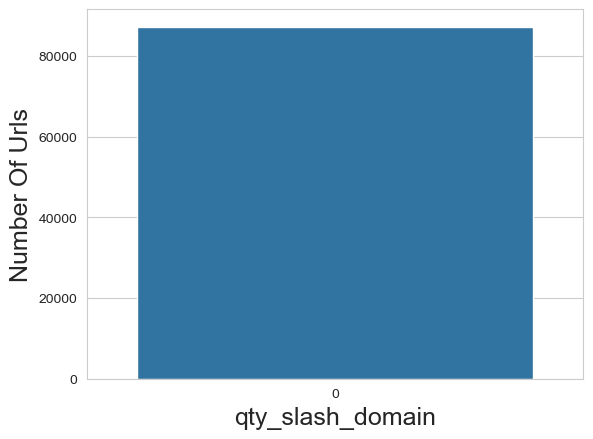



qty_questionmark_domain
0    87209
Name: count, dtype: int64


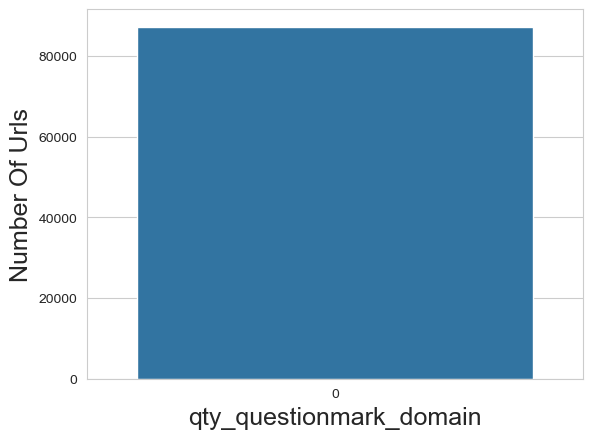



qty_equal_domain
0    87209
Name: count, dtype: int64


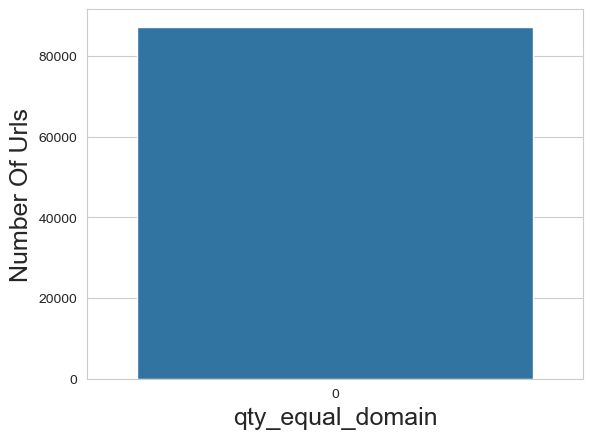



qty_at_domain
0    87208
1        1
Name: count, dtype: int64


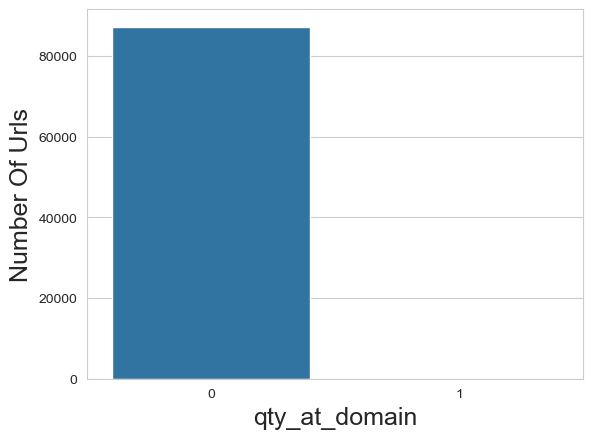



qty_and_domain
0    87209
Name: count, dtype: int64


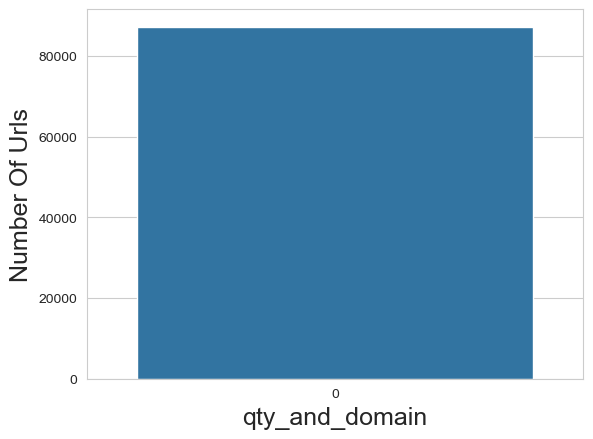



qty_exclamation_domain
0    87209
Name: count, dtype: int64


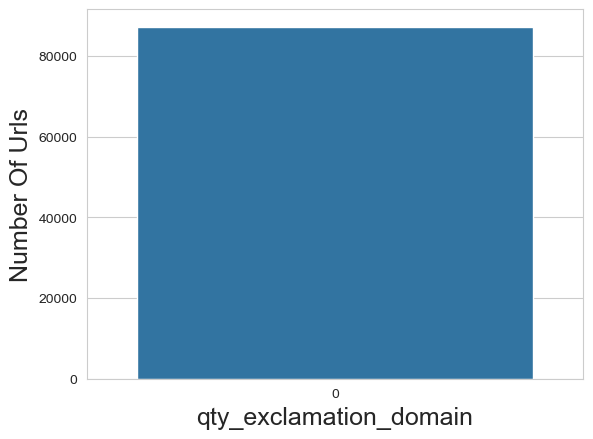



qty_space_domain
0    87209
Name: count, dtype: int64


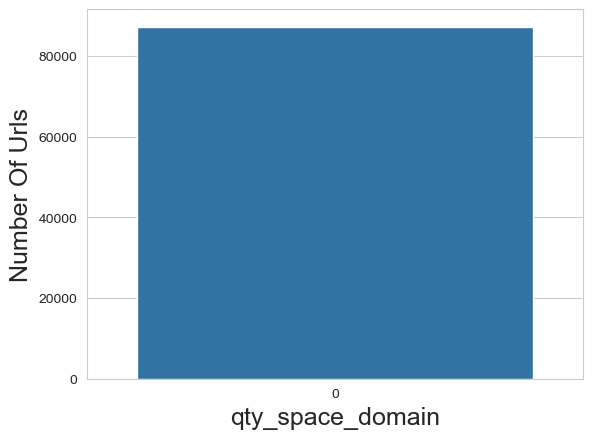



qty_tilde_domain
0    87209
Name: count, dtype: int64


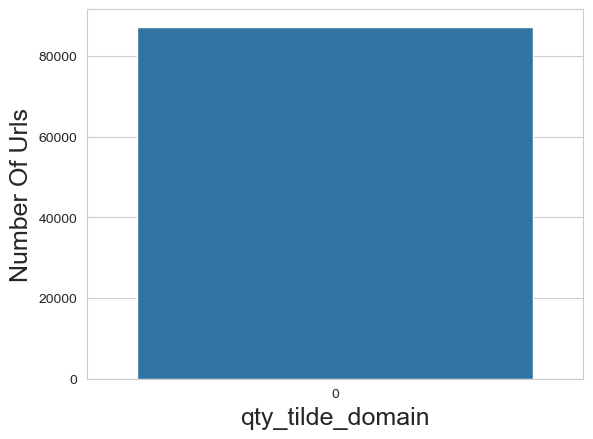



qty_comma_domain
0    87209
Name: count, dtype: int64


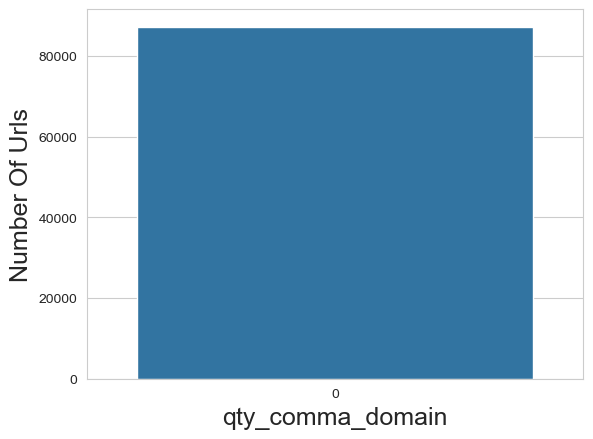



qty_plus_domain
0    87209
Name: count, dtype: int64


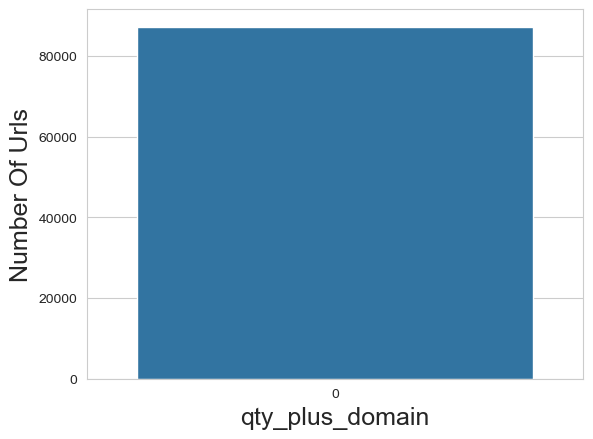



qty_asterisk_domain
0    87209
Name: count, dtype: int64


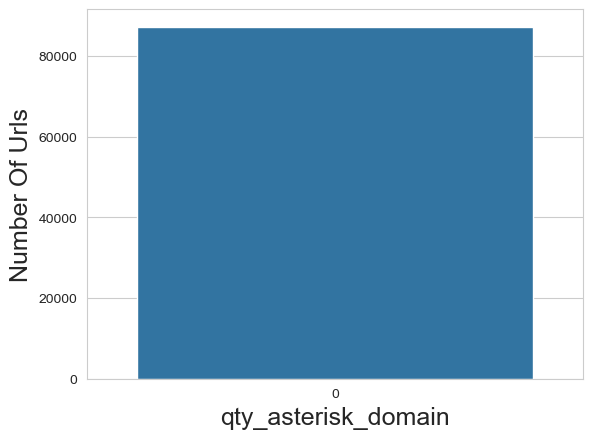



qty_hashtag_domain
0    87209
Name: count, dtype: int64


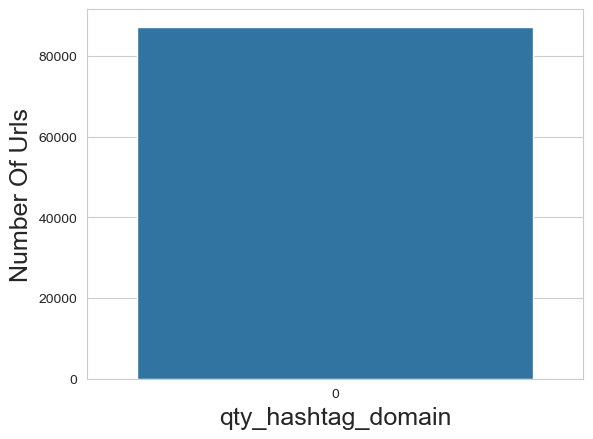



qty_dollar_domain
0    87209
Name: count, dtype: int64


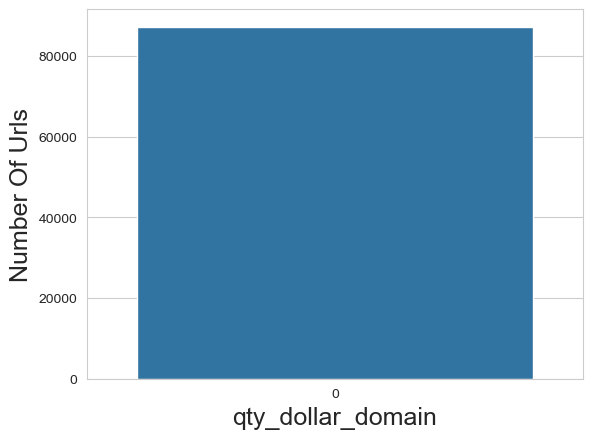



qty_percent_domain
0    87209
Name: count, dtype: int64


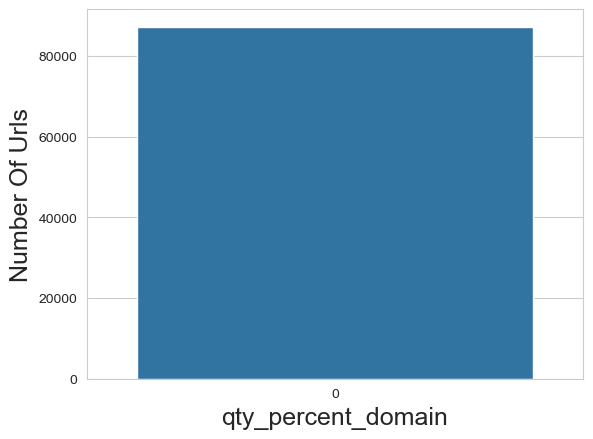



domain_in_ip
0    87015
1      194
Name: count, dtype: int64


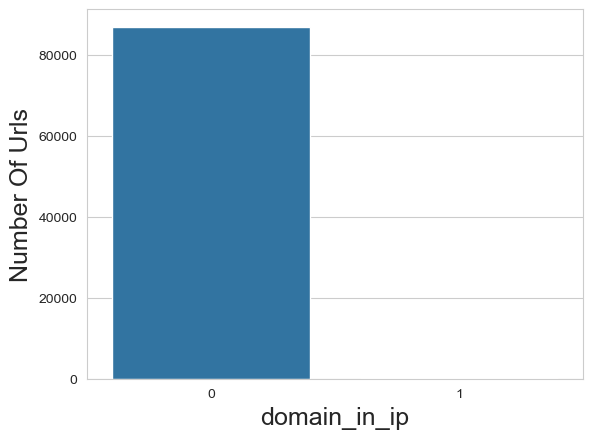



server_client_domain
0    86811
1      398
Name: count, dtype: int64


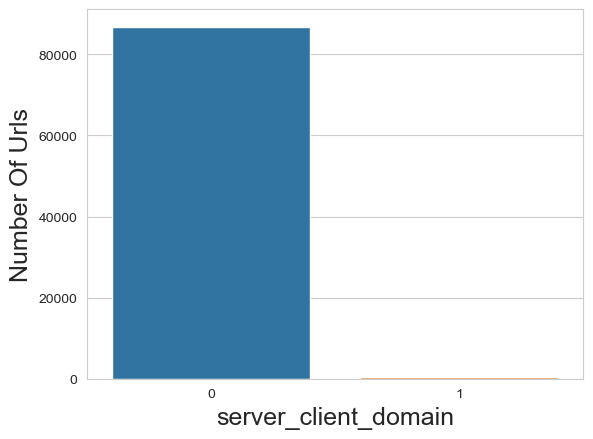



email_in_url
0    85594
1     1615
Name: count, dtype: int64


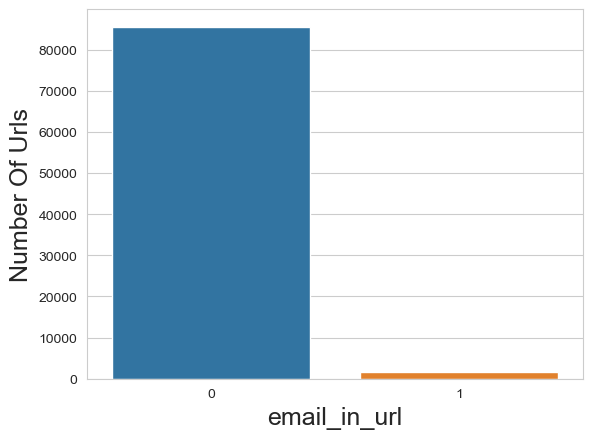



tls_ssl_certificate
1    44890
0    42319
Name: count, dtype: int64


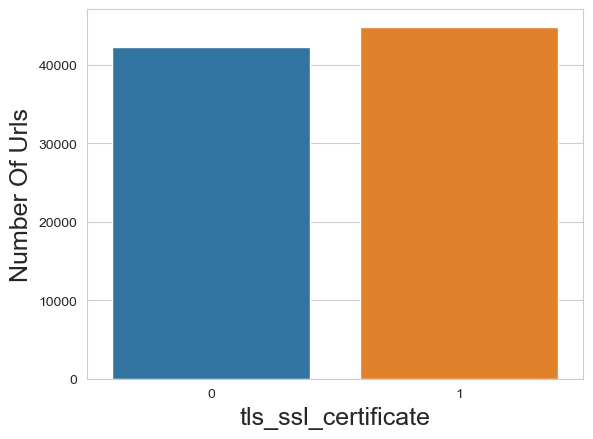



url_shortened
0    86723
1      486
Name: count, dtype: int64


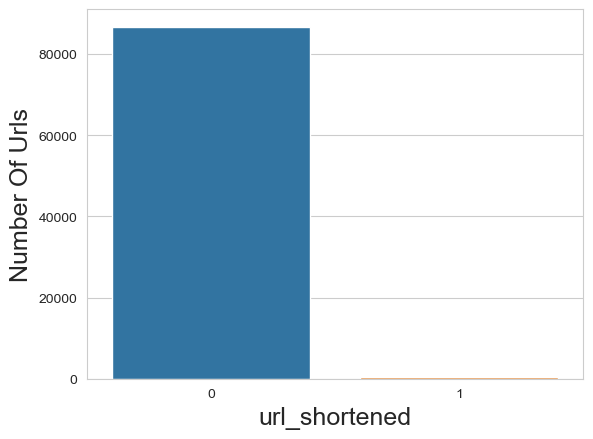



phishing
0    56712
1    30497
Name: count, dtype: int64


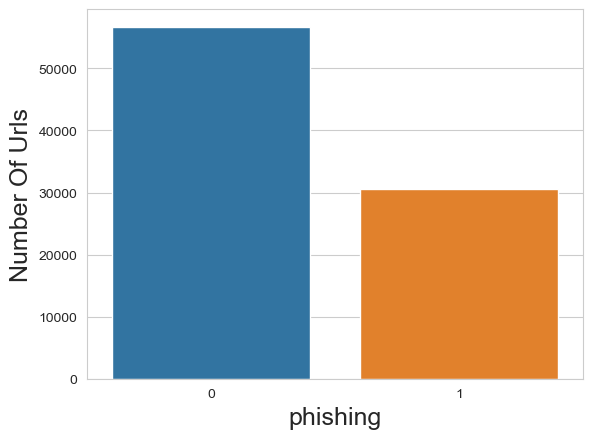

In [19]:
for i in binary_cols:
   print(df[i].value_counts())
   sns.countplot(x=i,data=df)
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.show()
   print("\n")

qty_dot_url
2     52723
1     15577
3     13042
4      3576
5      1005
6       453
7       215
14      134
8       104
15       86
9        63
10       48
16       44
13       37
12       33
11       32
17       22
18        6
20        3
22        3
23        1
24        1
19        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


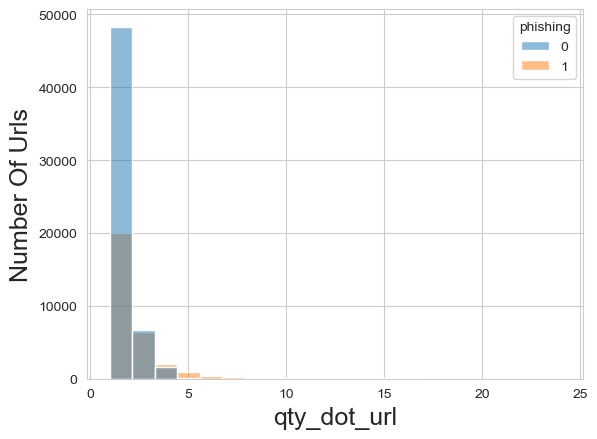



qty_hyphen_url
0     71825
1     10398
2      2420
3       901
4       509
5       350
6       215
7       155
8       110
9        75
10       73
11       53
12       37
13       25
14       13
15       10
17        8
21        5
16        5
18        4
19        3
20        3
26        2
25        2
23        2
31        2
35        1
34        1
24        1
27        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


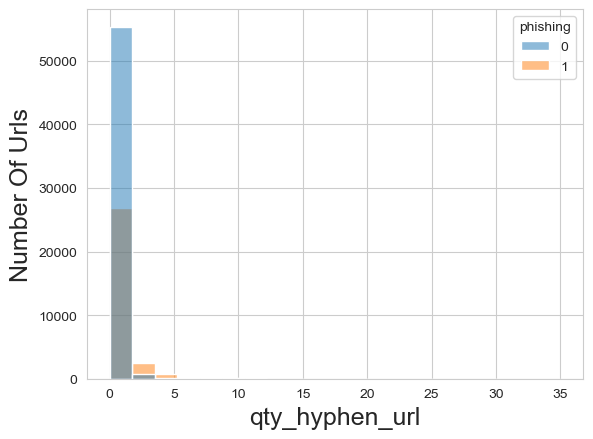



qty_underline_url
0     81898
1      3296
2      1040
3       471
4       204
5        95
7        45
6        40
8        26
9        18
17       17
11       15
10       14
12        8
13        6
19        5
14        4
21        2
16        2
15        1
18        1
20        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


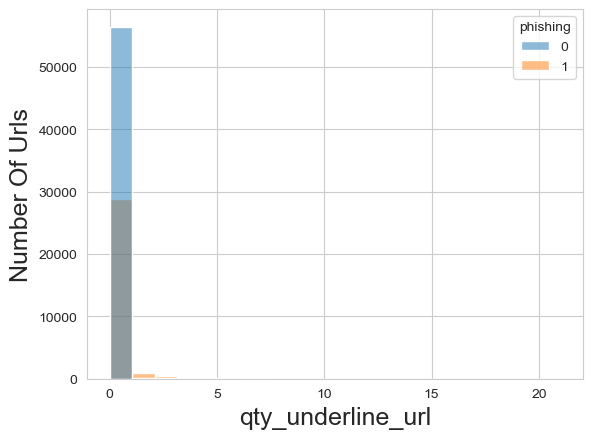



qty_slash_url
0     46323
1     13466
3      8344
2      8016
4      4624
5      2978
6      1643
7       885
8       411
9       231
10      104
12       75
11       60
16       15
13       13
14        6
17        4
15        3
19        2
18        1
44        1
21        1
22        1
29        1
20        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


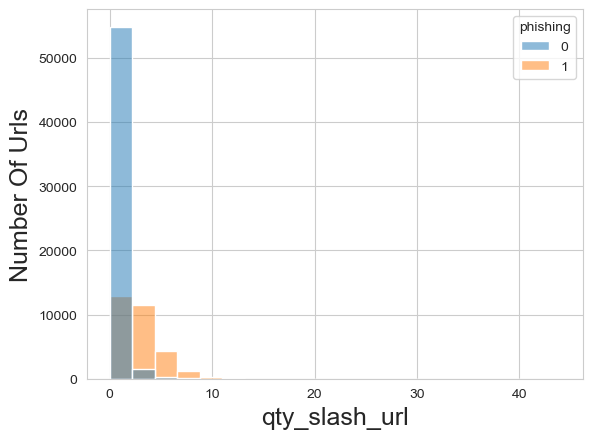



qty_questionmark_url
0    86495
1      658
2       50
3        3
9        2
7        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


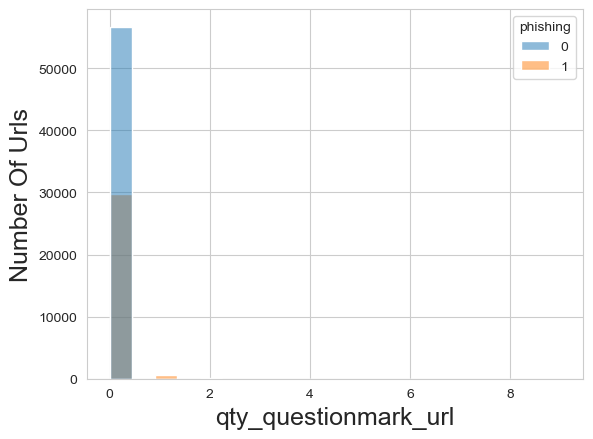



qty_equal_url
0     80002
1      3469
3      1288
2      1233
6       305
4       264
5       172
7       117
11      109
9        90
10       65
8        50
12       17
13       13
14        8
17        2
16        2
15        1
23        1
20        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


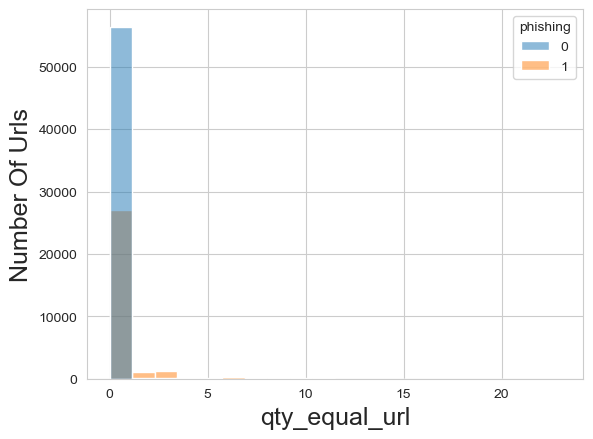



qty_at_url
0     85509
1      1651
2        20
4         7
3         6
5         3
10        2
43        2
15        2
6         2
14        1
12        1
11        1
7         1
8         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


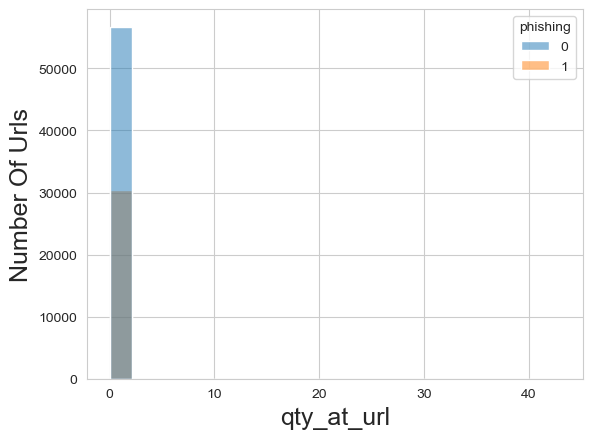



qty_and_url
0     83463
2      1276
1      1167
3       256
5       252
10      177
4       137
9       124
6       115
8        75
12       46
11       44
7        36
13       20
15        6
14        5
19        3
17        2
26        2
16        2
22        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


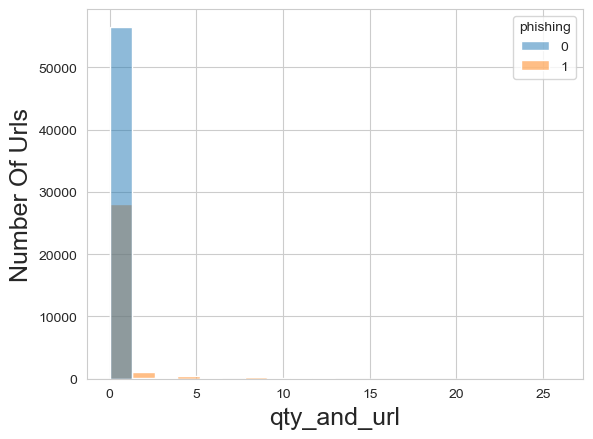



qty_exclamation_url
0     87016
1       167
2        16
5         2
3         2
9         2
8         1
4         1
6         1
10        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


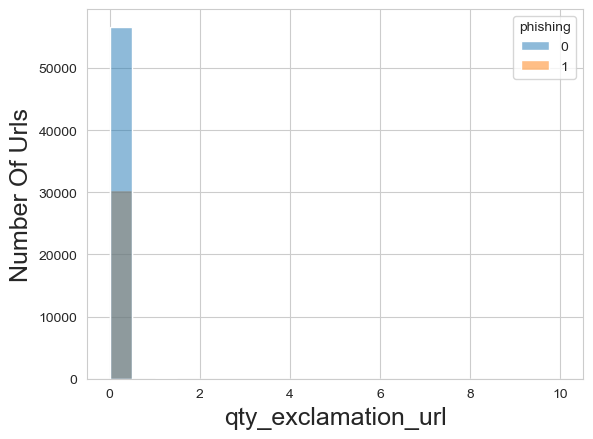



qty_space_url
0    87175
1       20
9        3
3        3
2        3
4        2
7        2
6        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


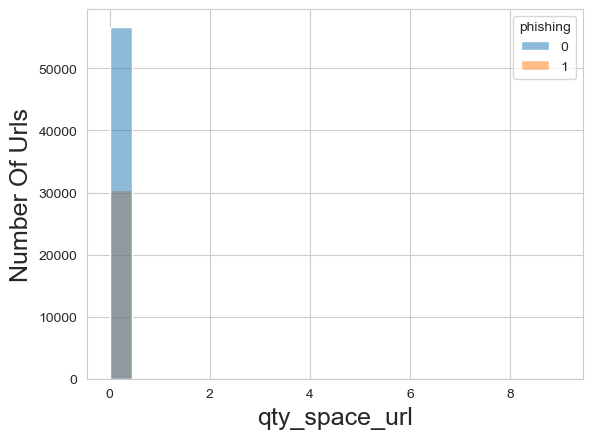



qty_tilde_url
0    86992
1      187
3       17
5        6
2        5
4        2
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


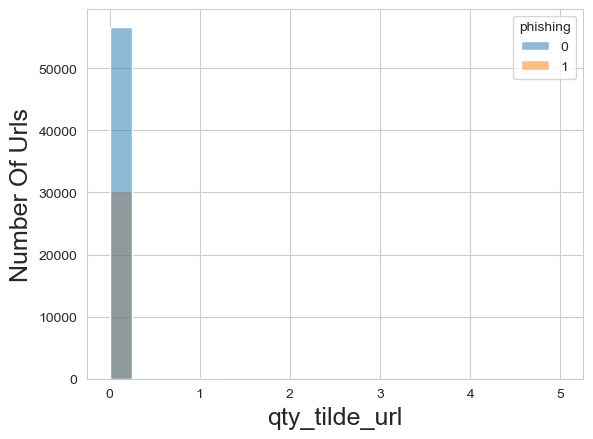



qty_comma_url
0     87127
1        61
3        14
4         2
2         2
5         1
11        1
7         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


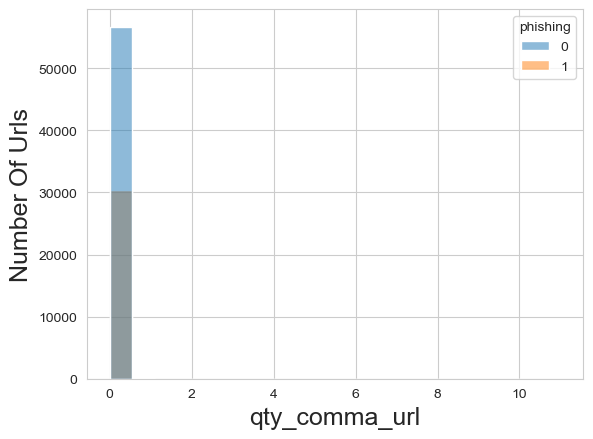



qty_plus_url
0     87083
1        86
2        17
3         7
4         5
6         4
5         3
9         2
19        1
7         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


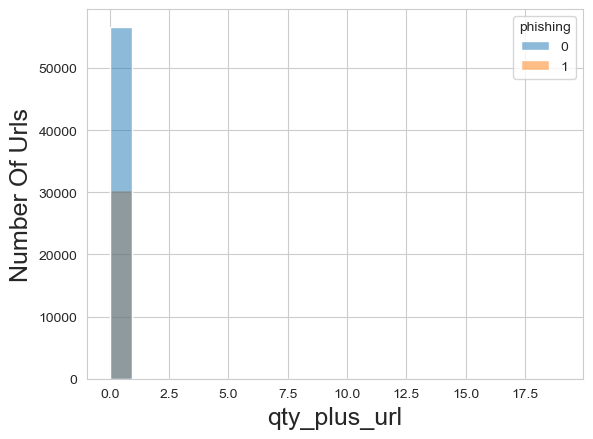



qty_asterisk_url
0     87150
1        18
2        11
4         6
14        3
20        3
9         3
3         3
22        2
8         2
5         1
6         1
60        1
21        1
19        1
10        1
12        1
7         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


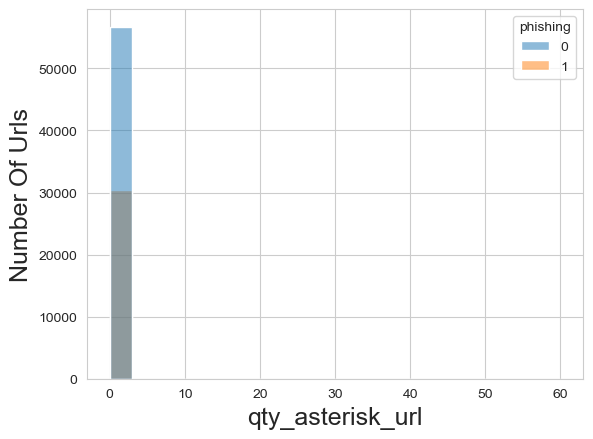



qty_hashtag_url
0     87198
3         3
1         3
2         2
9         1
13        1
7         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


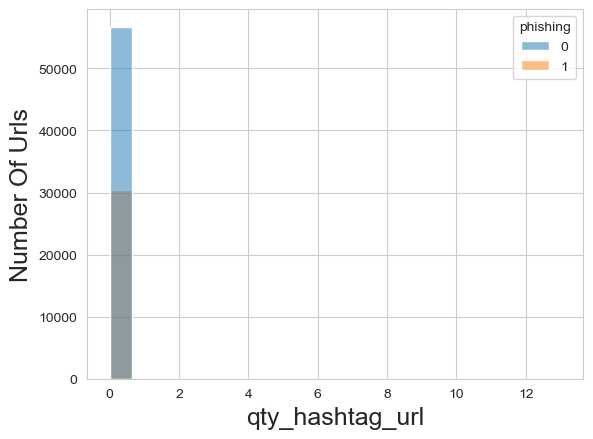



qty_dollar_url
0     87155
1        22
3        12
4         5
2         4
10        3
5         3
6         2
8         2
9         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


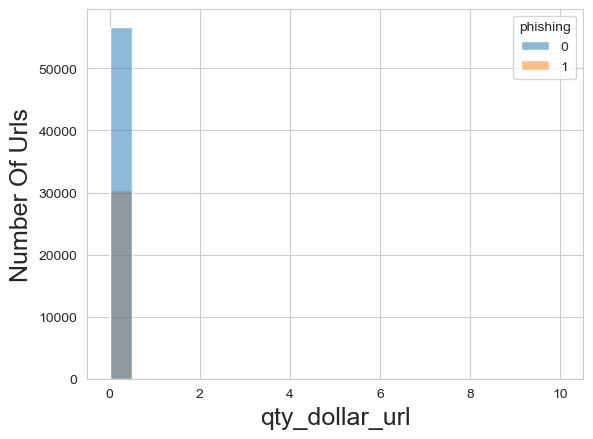



qty_percent_url
0      85711
1        610
2        209
3         86
4         83
5         82
6         65
9         42
8         37
10        26
12        26
16        25
18        21
7         19
14        17
20        17
28        13
22        13
15        12
32         8
13         6
26         6
21         6
17         6
19         6
34         5
51         5
24         5
11         4
62         3
23         3
27         3
38         3
36         3
66         2
30         2
29         2
78         2
44         2
35         1
162        1
54         1
117        1
127        1
40         1
65         1
174        1
48         1
39         1
52         1
46         1
42         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


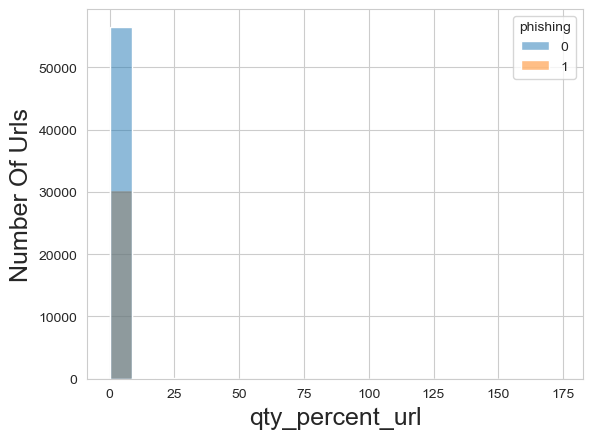



qty_tld_url
1     83063
2      3516
3       352
0       219
4        51
5         4
7         2
12        1
9         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


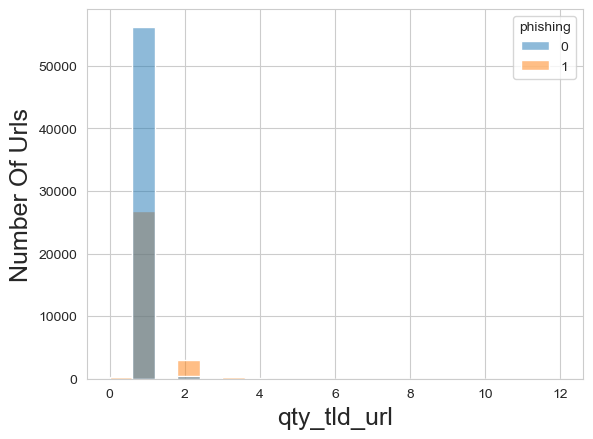



length_url
18     4499
19     4473
17     4281
20     4278
16     4069
       ... 
915       1
523       1
646       1
413       1
558       1
Name: count, Length: 453, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


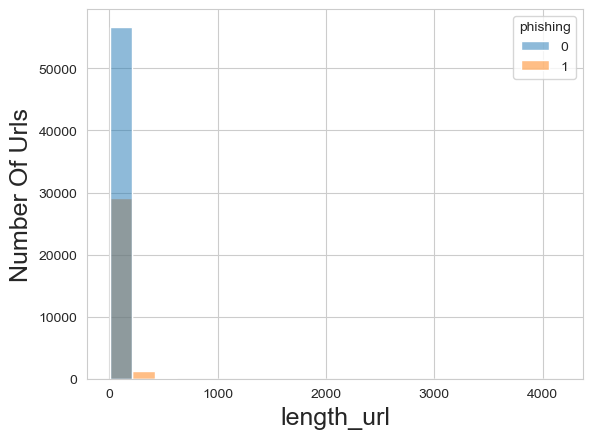



qty_dot_domain
2     54839
1     22931
3      7528
4      1624
5       100
0        82
6        25
7        22
10       15
9        11
8         9
12        6
14        4
15        4
11        3
17        2
13        2
19        1
21        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


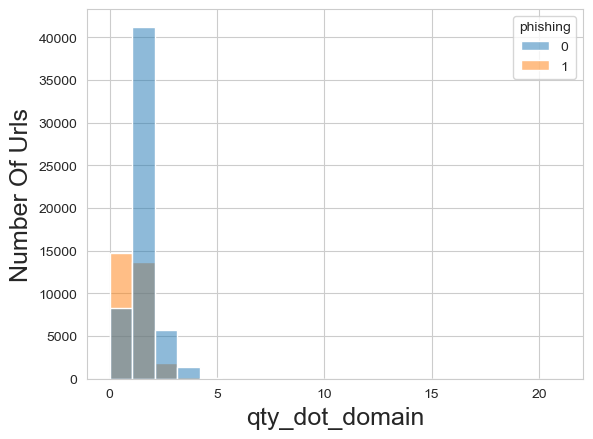



qty_hyphen_domain
0     79228
1      6621
2       965
3       217
4       107
5        38
6        22
7         4
11        3
10        2
8         1
9         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


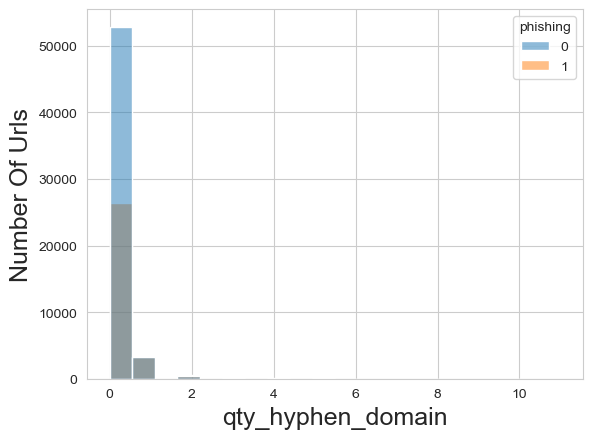



qty_underline_domain
0    87154
1       44
2       10
3        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


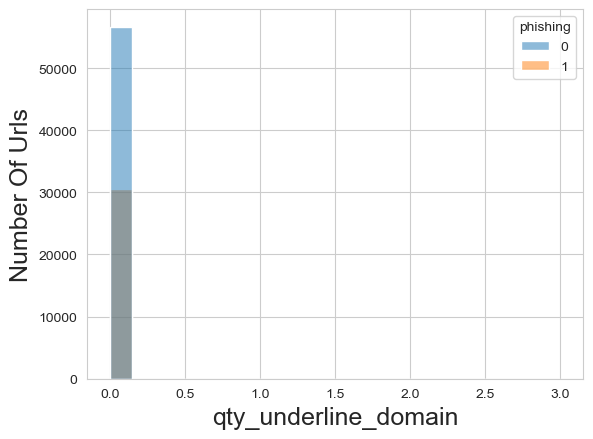



qty_vowels_domain
5     16033
6     14374
4     14277
3      9660
7      9515
8      6267
2      4695
9      4102
1      2734
10     2106
11     1287
0       622
12      586
13      352
14      237
15       98
16       62
17       41
19       35
20       29
18       26
22       20
21       11
23        6
28        5
35        5
24        3
26        3
33        2
31        2
27        2
25        2
53        1
36        1
38        1
44        1
50        1
29        1
48        1
41        1
39        1
61        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


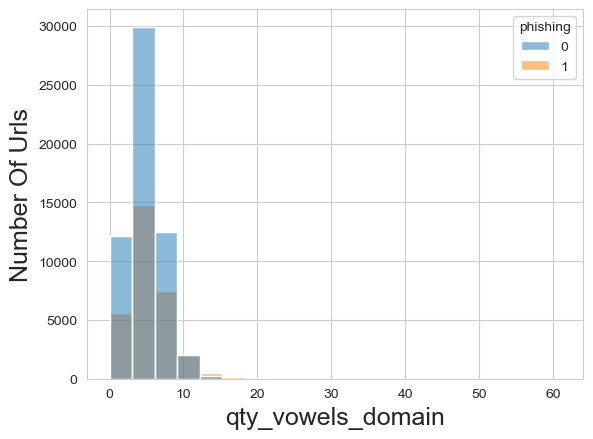



domain_length
16     8056
18     6097
17     6034
19     5927
15     5777
       ... 
93        1
142       1
69        1
161       1
128       1
Name: count, Length: 94, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


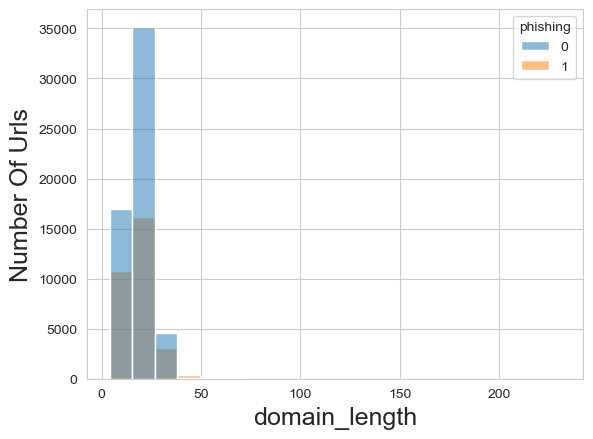



qty_dot_directory
-1     46323
 0     25740
 1     13232
 2      1128
 3       407
 4       192
 5        91
 7        32
 6        32
 10       11
 8         8
 11        5
 9         3
 19        2
 15        2
 13        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


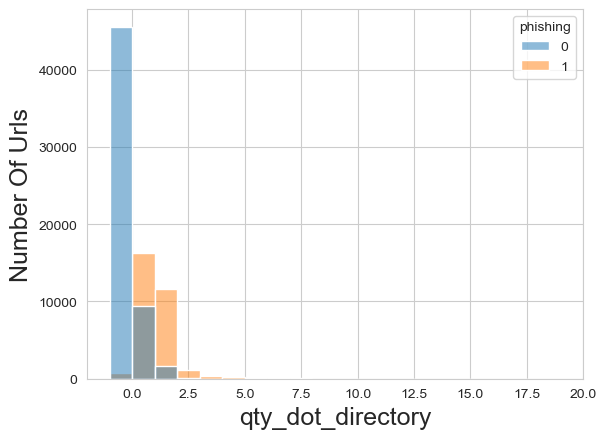



qty_hyphen_directory
-1     46323
 0     33491
 1      4872
 2      1031
 3       426
 4       258
 5       229
 6       132
 7       117
 8        83
 9        73
 10       56
 11       42
 12       24
 13       18
 14        8
 15        7
 17        4
 16        4
 18        3
 21        3
 20        2
 23        2
 19        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


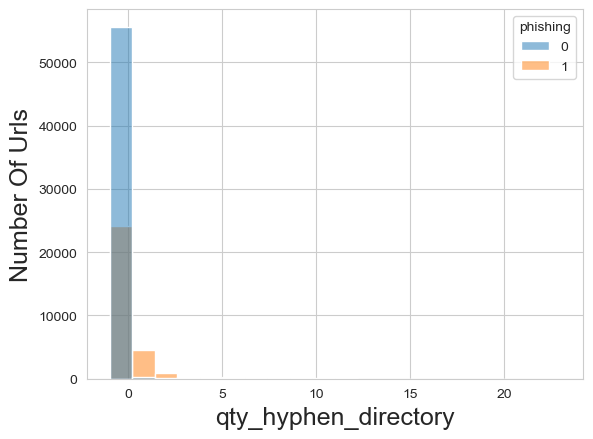



qty_underline_directory
-1     46323
 0     37629
 1      2273
 2       614
 3       195
 4        77
 5        39
 7        14
 6        13
 9         6
 8         6
 13        5
 11        4
 10        3
 12        3
 17        2
 14        2
 16        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


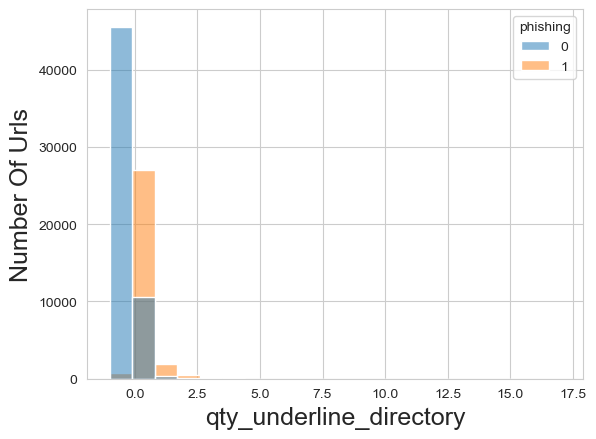



qty_slash_directory
-1     46323
 1     13799
 3      8374
 2      8100
 4      4572
 5      2936
 6      1562
 7       783
 8       355
 9       191
 10       94
 11       48
 12       44
 13       11
 16       10
 14        2
 15        2
 21        1
 22        1
 20        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


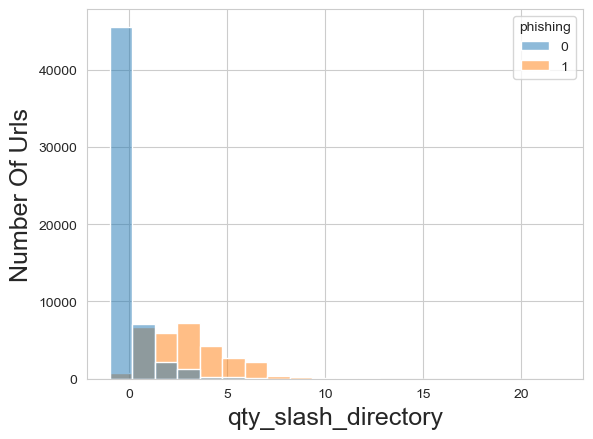



qty_questionmark_directory
-1    46323
 0    40886
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


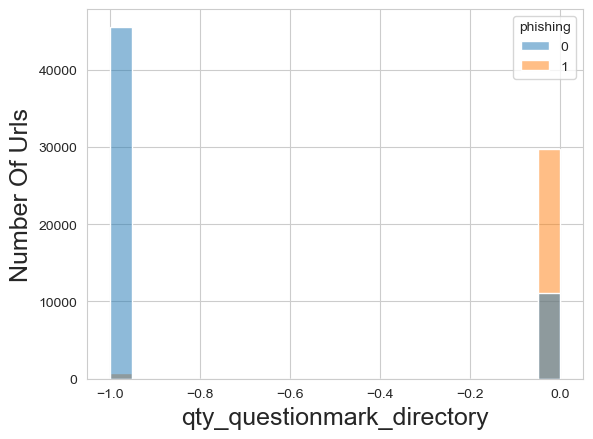



qty_equal_directory
-1    46323
 0    40391
 1      398
 2       73
 3       17
 4        5
 5        2
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


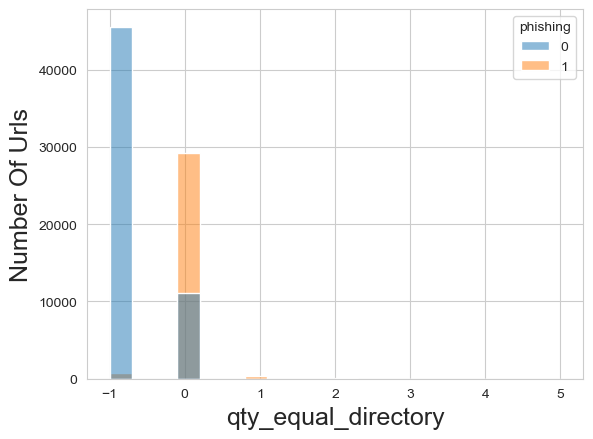



qty_at_directory
-1     46323
 0     40758
 1       102
 2         7
 3         6
 4         4
 43        2
 5         2
 10        1
 12        1
 11        1
 15        1
 6         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


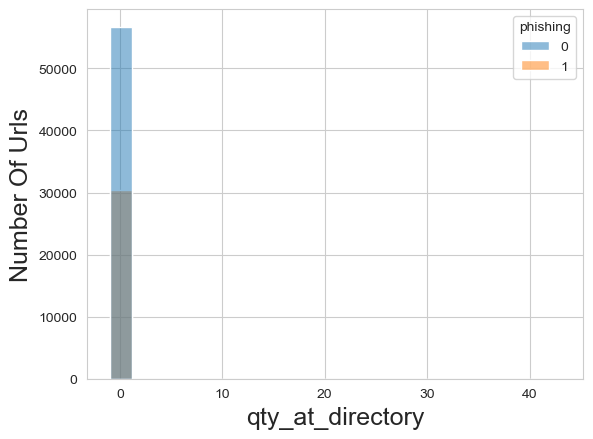



qty_and_directory
-1     46323
 0     40669
 1       189
 2         7
 3         5
 5         3
 4         3
 17        2
 26        2
 7         2
 19        1
 12        1
 13        1
 11        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


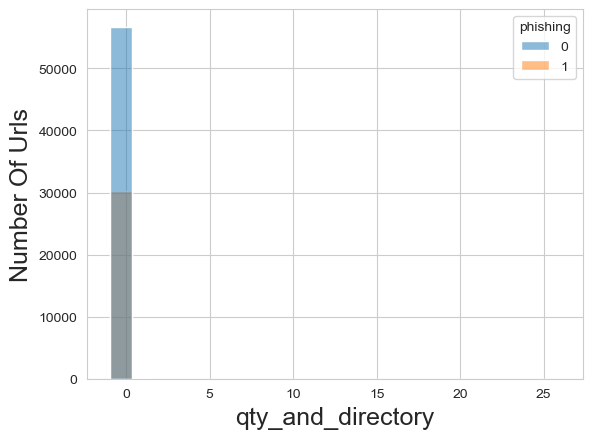



qty_exclamation_directory
-1    46323
 0    40776
 1       96
 2        8
 5        2
 3        1
 4        1
 9        1
 6        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


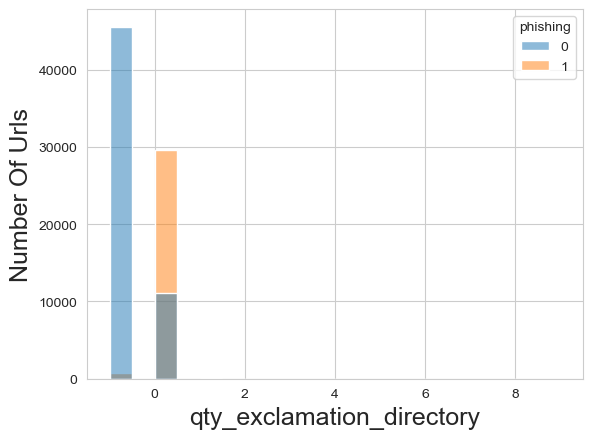



qty_space_directory
-1    46323
 0    40862
 1       13
 9        3
 3        3
 2        2
 4        1
 6        1
 7        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


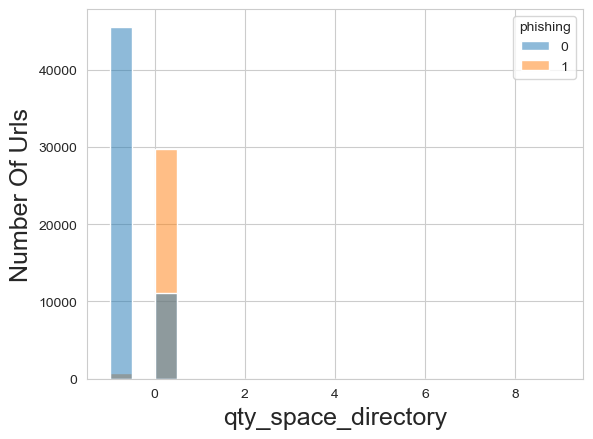



qty_tilde_directory
-1    46323
 0    40674
 1      182
 3       17
 5        6
 2        5
 4        2
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


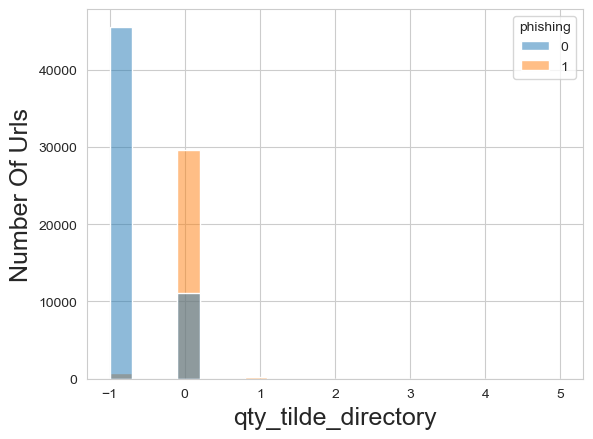



qty_comma_directory
-1    46323
 0    40855
 1       22
 3        8
 5        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


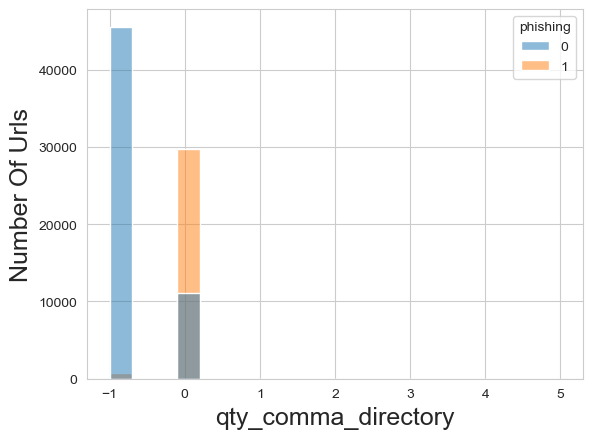



qty_plus_directory
-1     46323
 0     40853
 1        18
 2         4
 3         4
 9         2
 4         2
 5         1
 19        1
 7         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


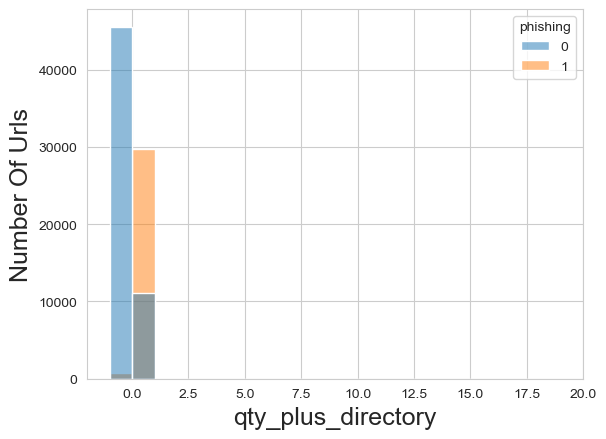



qty_asterisk_directory
-1     46323
 0     40839
 1        16
 2        11
 4         4
 14        3
 20        3
 22        2
 12        1
 10        1
 19        1
 5         1
 60        1
 9         1
 6         1
 7         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


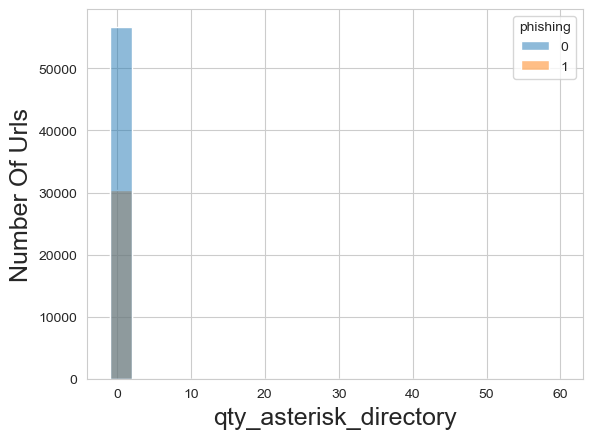



qty_hashtag_directory
-1    46323
 0    40886
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


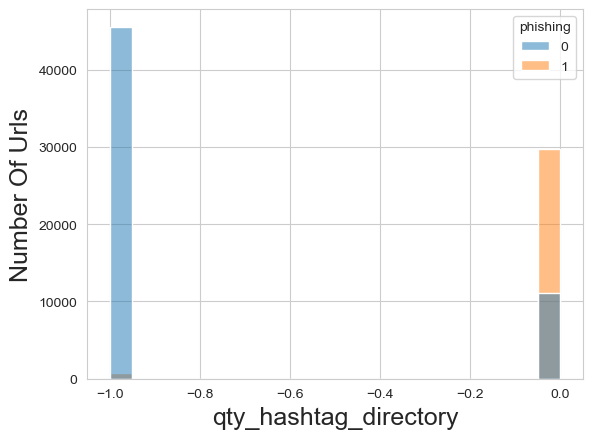



qty_dollar_directory
-1     46323
 0     40857
 1        10
 2         3
 10        3
 5         3
 4         3
 6         2
 8         2
 3         2
 9         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


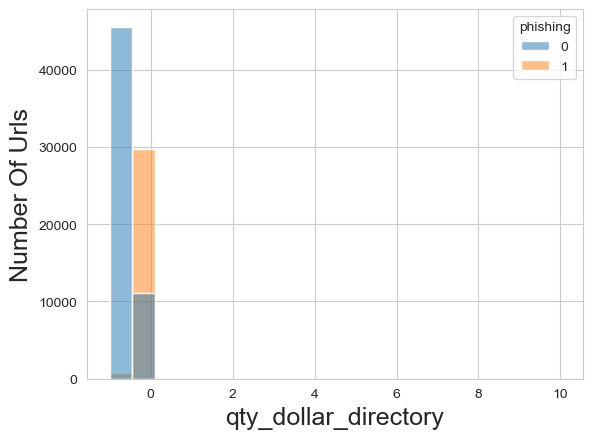



qty_percent_directory
-1      46323
 0      40028
 1        478
 2        107
 3         58
 5         40
 6         24
 4         22
 8         15
 16        14
 9         12
 28        10
 32         5
 34         5
 7          5
 22         5
 24         5
 12         5
 10         5
 18         5
 20         5
 15         4
 38         3
 36         2
 78         2
 44         2
 62         2
 66         2
 14         2
 29         1
 13         1
 51         1
 23         1
 162        1
 54         1
 40         1
 117        1
 127        1
 174        1
 48         1
 27         1
 46         1
 42         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


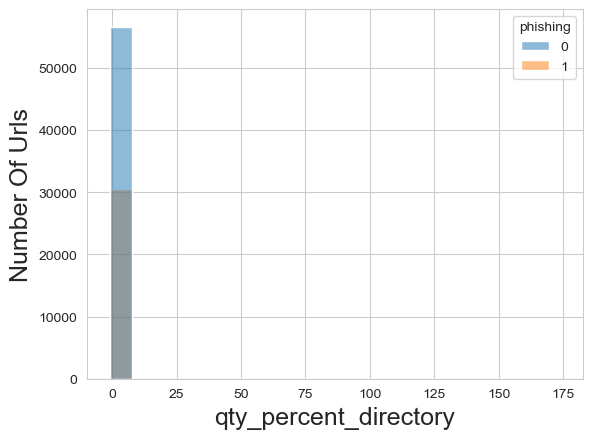



directory_length
-1      46323
 1       8731
 7        982
 18       957
 6        937
        ...  
 393        1
 147        1
 163        1
 786        1
 543        1
Name: count, Length: 239, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


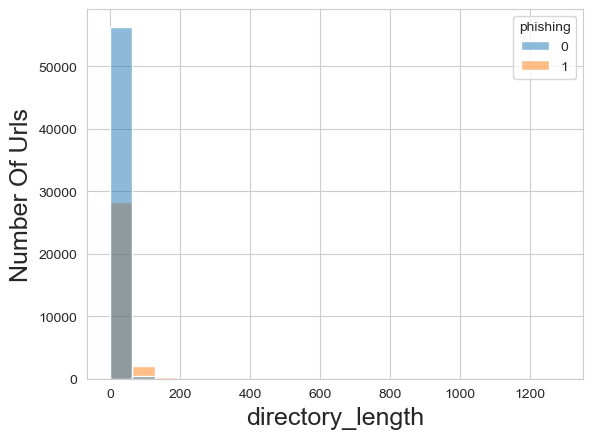



qty_dot_file
-1     46323
 0     26756
 1     13681
 2       308
 3       120
 4        15
 5         3
 12        1
 7         1
 10        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


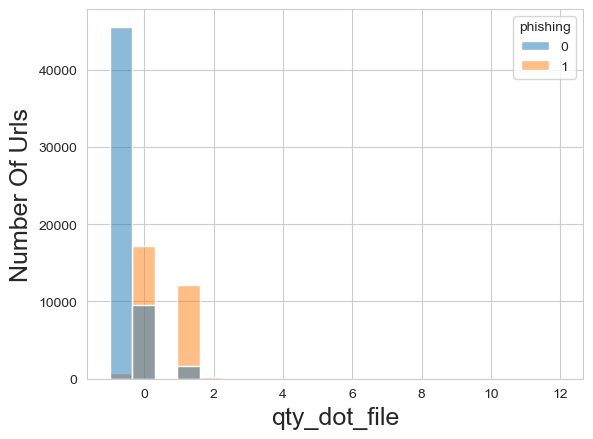



qty_hyphen_file
-1     46323
 0     39134
 1       858
 2       241
 3       147
 4       129
 5       111
 6        73
 8        52
 7        42
 9        28
 11       23
 10       17
 13       11
 12        7
 15        3
 21        3
 14        2
 17        2
 16        1
 18        1
 20        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


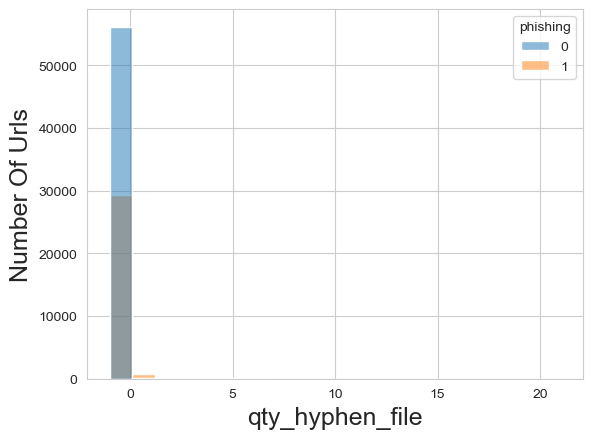



qty_underline_file
-1     46323
 0     39666
 1       749
 2       298
 3        79
 4        30
 5        19
 7        10
 6         8
 9         6
 13        5
 8         4
 10        3
 12        2
 11        2
 17        2
 14        2
 16        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


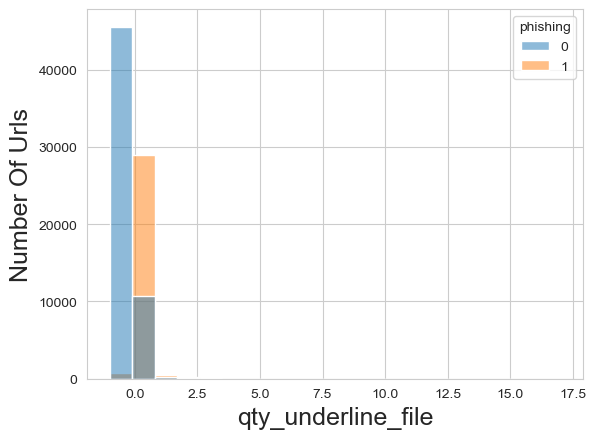



qty_slash_file
-1    46323
 0    40886
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


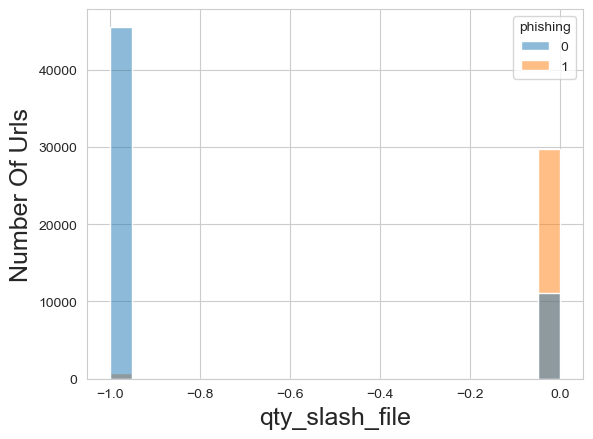



qty_questionmark_file
-1    46323
 0    40886
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


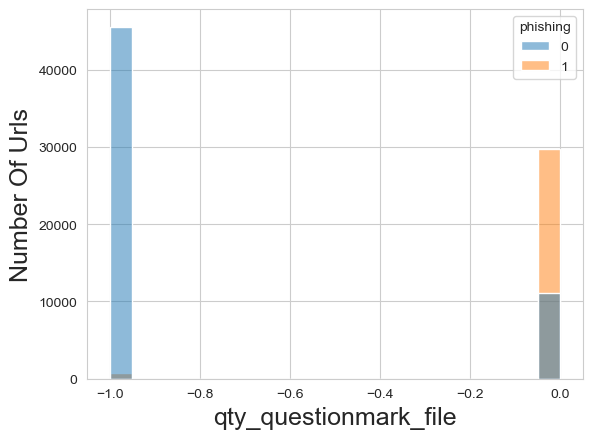



qty_equal_file
-1    46323
 0    40774
 1       82
 2       26
 3        4
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


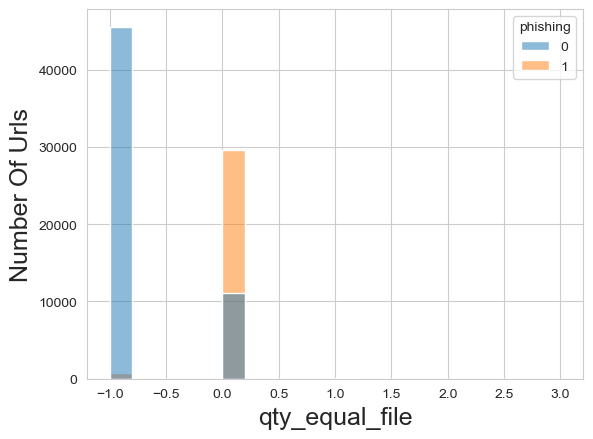



qty_at_file
-1    46323
 0    40861
 1       24
 2        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


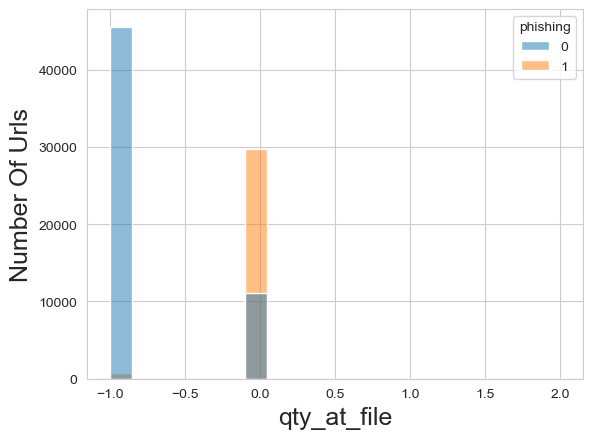



qty_and_file
-1    46323
 0    40764
 1      119
 2        2
 3        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


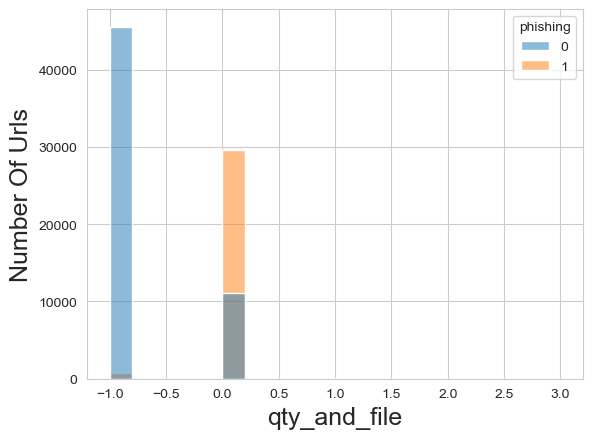



qty_exclamation_file
-1    46323
 0    40798
 1       86
 4        1
 2        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


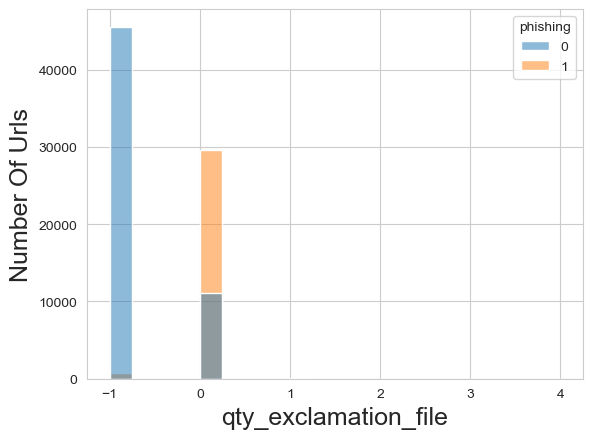



qty_space_file
-1    46323
 0    40873
 1        7
 4        1
 9        1
 3        1
 6        1
 7        1
 2        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


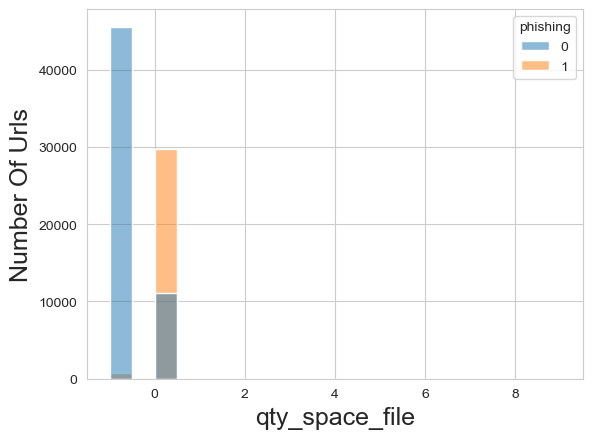



qty_tilde_file
-1    46323
 0    40871
 1        7
 2        6
 3        1
 4        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


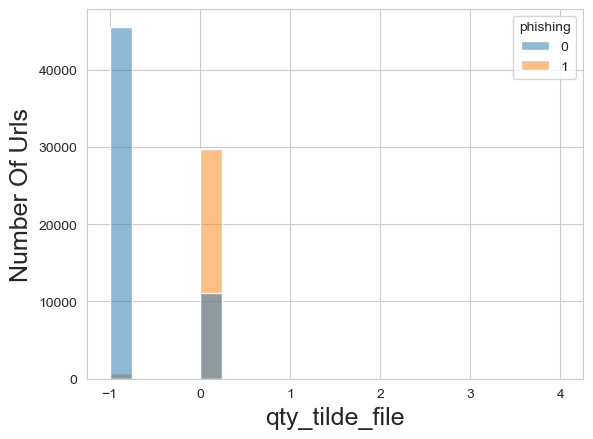



qty_comma_file
-1    46323
 0    40867
 1       10
 3        7
 5        1
 2        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


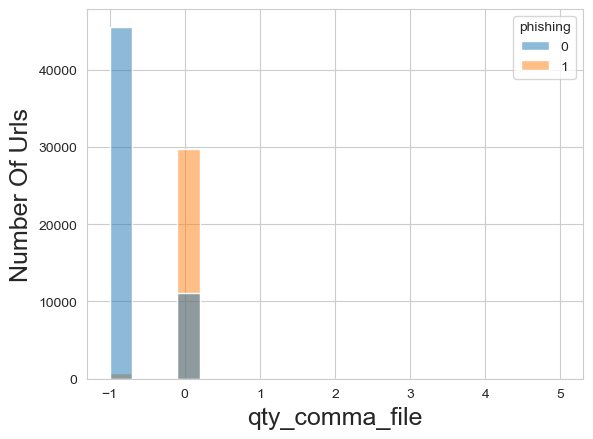



qty_plus_file
-1     46323
 0     40864
 1        12
 3         3
 2         2
 6         1
 9         1
 19        1
 4         1
 5         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


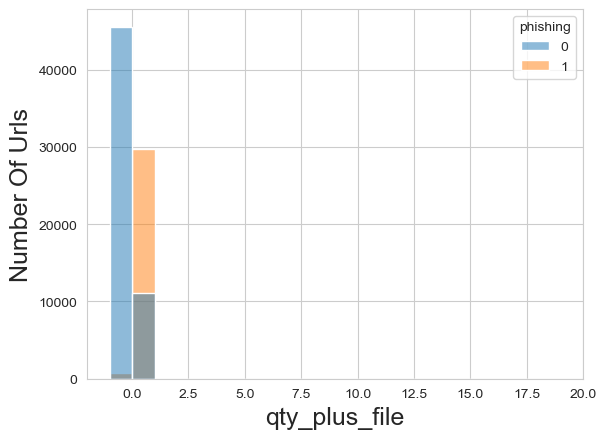



qty_asterisk_file
-1     46323
 0     40874
 1         8
 60        1
 20        1
 2         1
 14        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


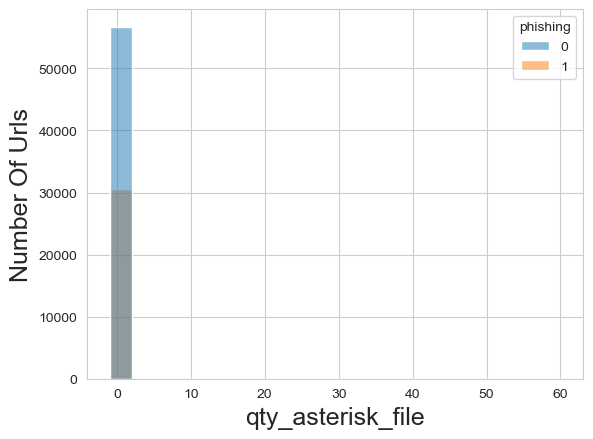



qty_hashtag_file
-1    46323
 0    40886
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


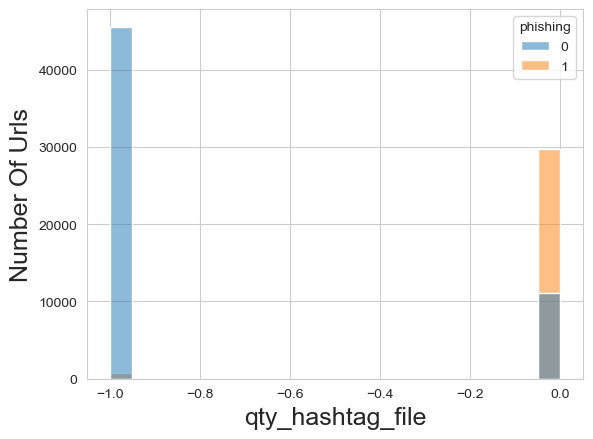



qty_dollar_file
-1    46323
 0    40886
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


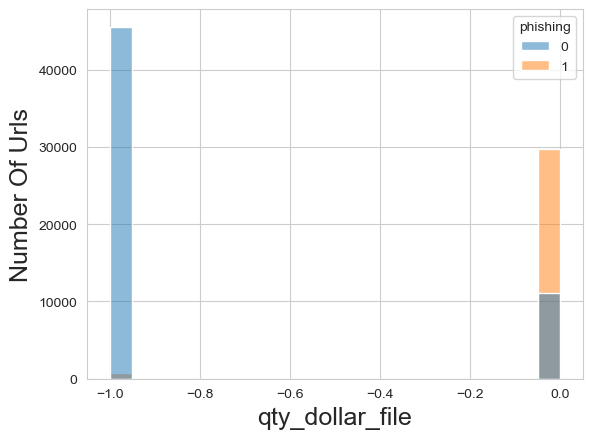



qty_percent_file
-1      46323
 0      40548
 1        108
 2         59
 5         32
 3         25
 6         13
 16        12
 8         11
 4         10
 28        10
 32         5
 34         5
 22         5
 18         5
 12         4
 20         4
 24         3
 38         3
 10         2
 14         2
 62         2
 36         2
 66         2
 44         2
 48         1
 174        1
 7          1
 40         1
 15         1
 127        1
 117        1
 54         1
 162        1
 51         1
 13         1
 42         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


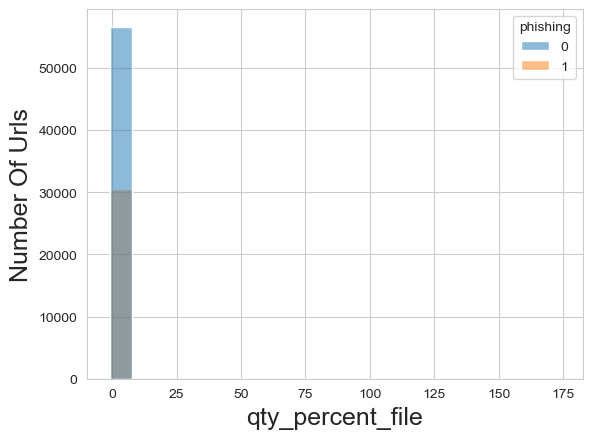



file_length
-1      46323
 0      19450
 9       4785
 10      2104
 6       1320
        ...  
 212        1
 473        1
 500        1
 122        1
 504        1
Name: count, Length: 168, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


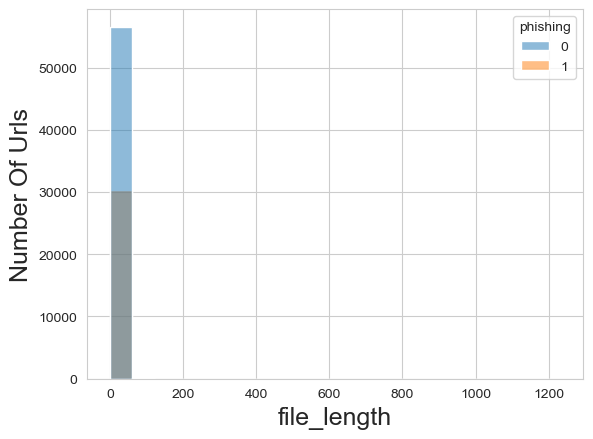



qty_dot_params
-1     79846
 0      4192
 1      1504
 2       824
 4       199
 3       176
 12      140
 13       72
 11       57
 5        51
 8        47
 6        28
 7        20
 9        19
 10       18
 14       14
 23        1
 15        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


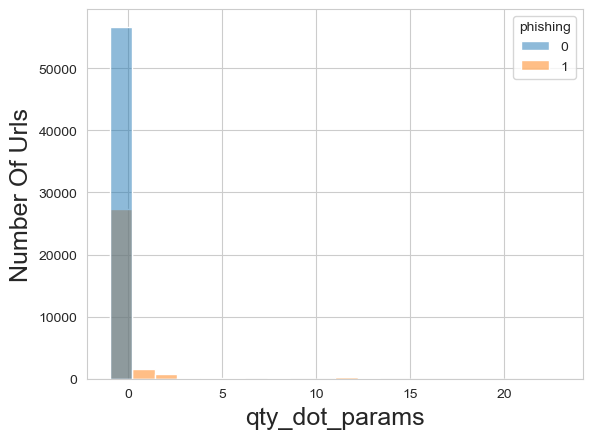



qty_hyphen_params
-1     79846
 0      6037
 1       773
 2       174
 4       169
 3        87
 5        32
 6        20
 12       12
 7        11
 8        10
 11        6
 13        5
 14        3
 10        3
 18        3
 9         2
 27        2
 26        2
 25        2
 19        2
 15        1
 35        1
 34        1
 20        1
 31        1
 21        1
 17        1
 16        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


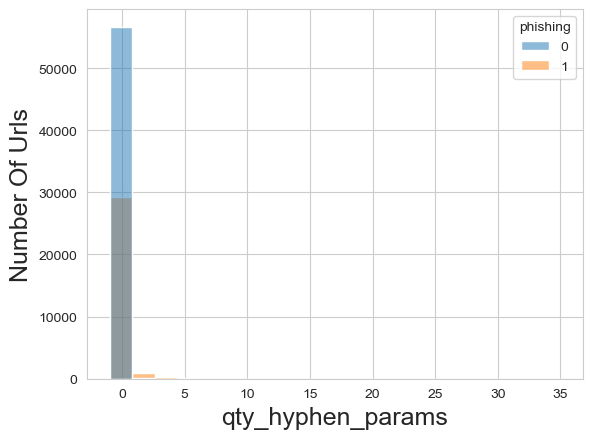



qty_underline_params
-1     79846
 0      5131
 1      1347
 2       319
 3       256
 4       143
 5        42
 6        38
 7        17
 8        16
 17       15
 9         8
 11        8
 10        7
 19        6
 12        4
 21        2
 15        2
 18        1
 14        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


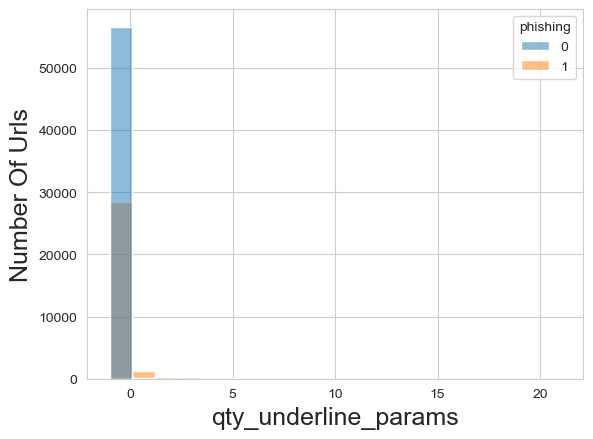



qty_slash_params
-1     79846
 0      6668
 1       219
 3       130
 4        78
 2        71
 5        64
 6        48
 7        37
 10       16
 8         9
 12        8
 9         8
 15        3
 14        2
 43        1
 11        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


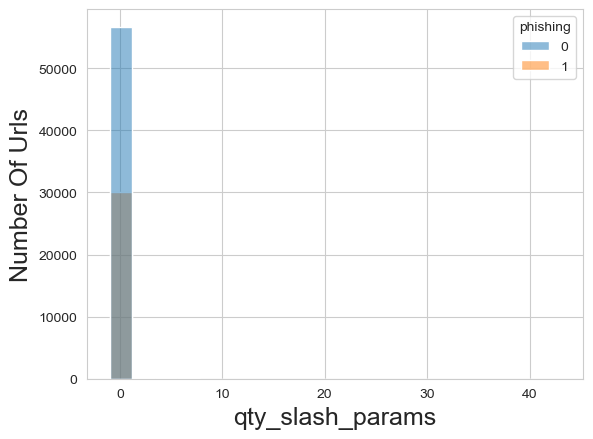



qty_questionmark_params
-1    79846
 0     6698
 1      638
 2       21
 3        3
 9        2
 7        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


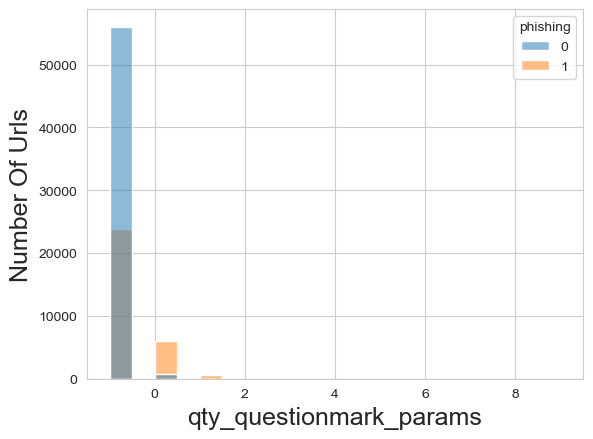



qty_equal_params
-1     79846
 1      3166
 3      1258
 2      1176
 0       665
 6       330
 4       239
 7       141
 5       123
 11       87
 10       62
 8        53
 9        22
 12       15
 13       12
 14        7
 17        2
 16        2
 15        1
 23        1
 20        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


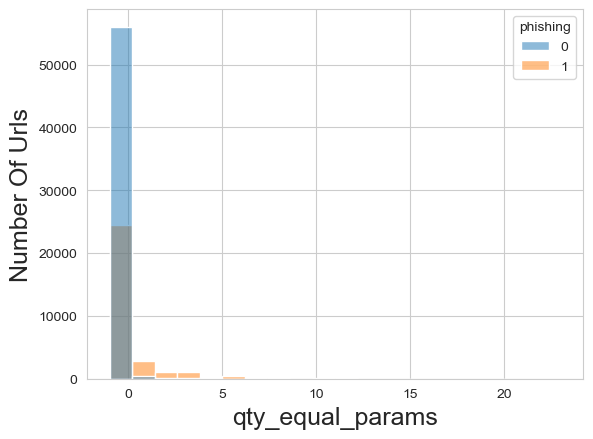



qty_at_params
-1     79846
 0      5800
 1      1552
 2         9
 10        1
 8         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


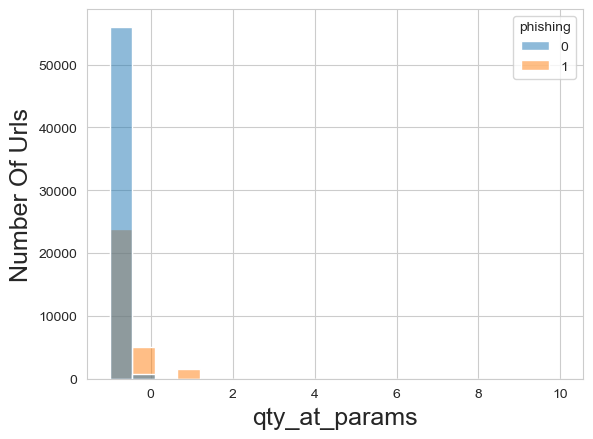



qty_and_params
-1     79846
 0      3847
 2      1259
 1      1075
 3       246
 10      211
 5       205
 4       130
 6       127
 9        95
 8        74
 7        35
 11       23
 13       16
 12        9
 15        4
 14        4
 19        2
 22        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


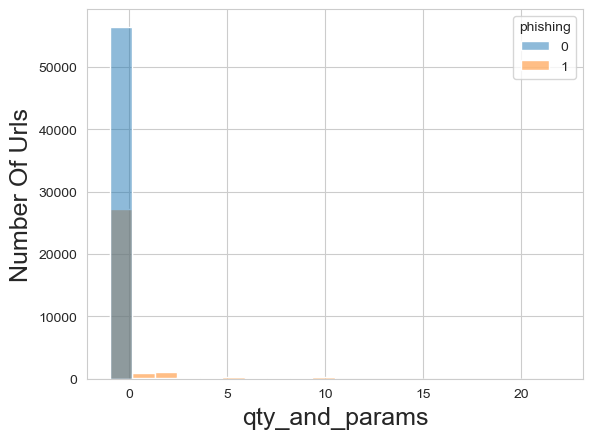



qty_exclamation_params
-1     79846
 0      7338
 1        20
 2         3
 8         1
 10        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


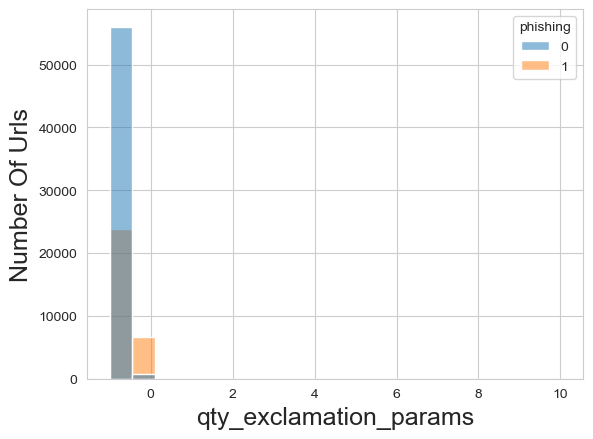



qty_space_params
-1    79846
 0     7359
 1        3
 4        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


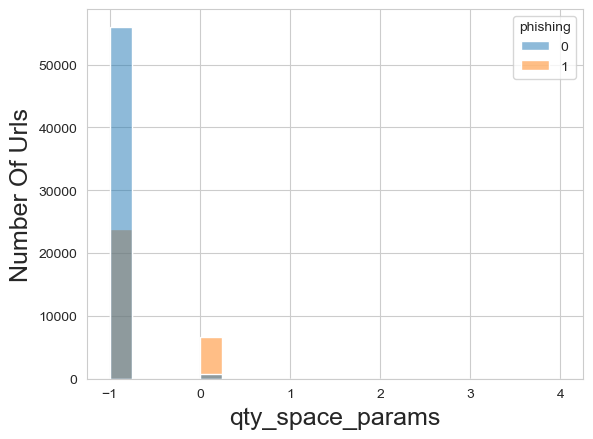



qty_tilde_params
-1    79846
 0     7358
 1        5
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


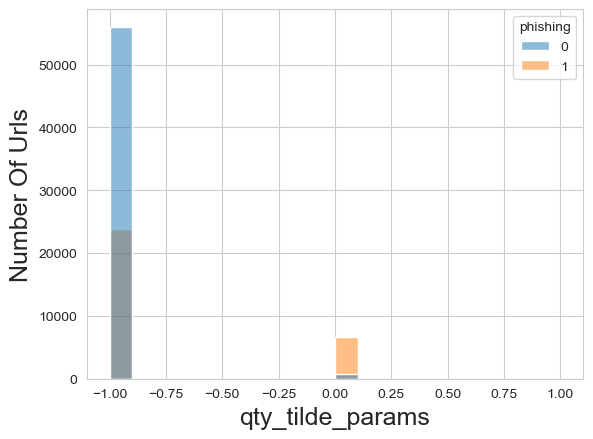



qty_comma_params
-1     79846
 0      7312
 1        39
 3         6
 4         2
 2         2
 11        1
 7         1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


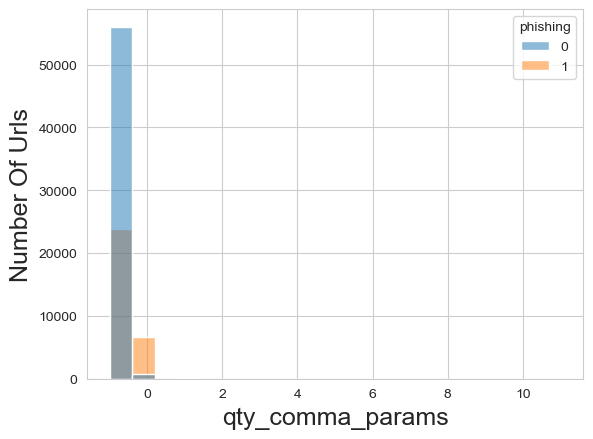



qty_plus_params
-1    79846
 0     7273
 1       66
 2       13
 6        4
 4        3
 3        3
 5        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


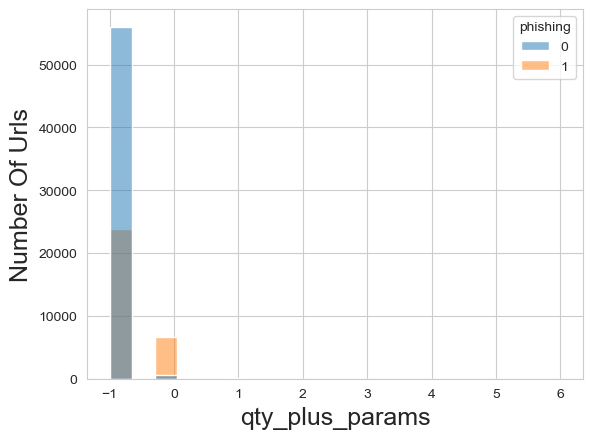



qty_asterisk_params
-1    79846
 0     7358
 1        4
 4        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


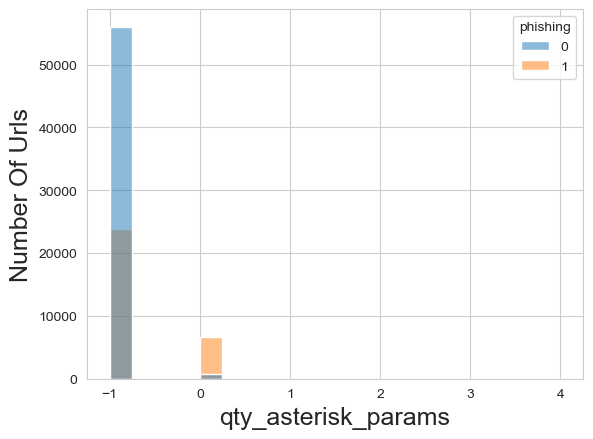



qty_hashtag_params
-1    79846
 0     7363
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


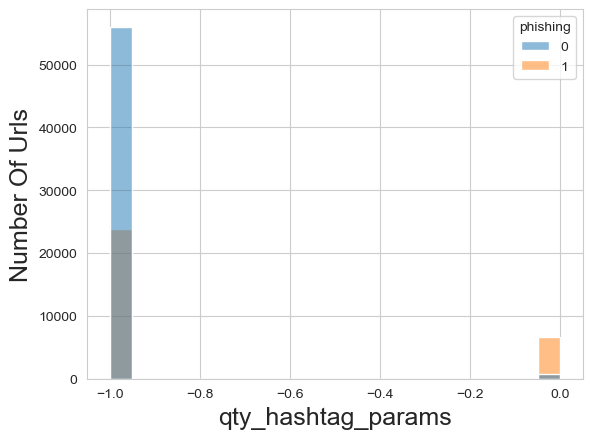



qty_dollar_params
-1    79846
 0     7348
 3        8
 1        6
 4        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


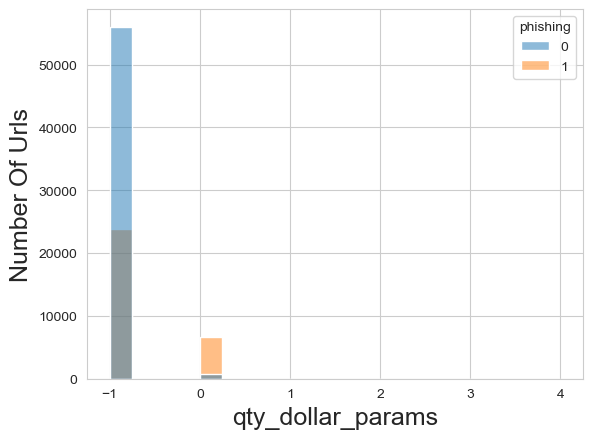



qty_percent_params
-1     79846
 0      6726
 1       141
 2       105
 4        59
 5        43
 6        40
 9        30
 10       22
 3        21
 8        20
 12       17
 18       16
 14       15
 7        13
 20       12
 16       11
 15        8
 22        8
 26        6
 19        6
 17        6
 21        6
 13        5
 51        4
 11        4
 32        3
 28        3
 30        2
 23        2
 27        2
 29        1
 65        1
 52        1
 39        1
 36        1
 35        1
 62        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


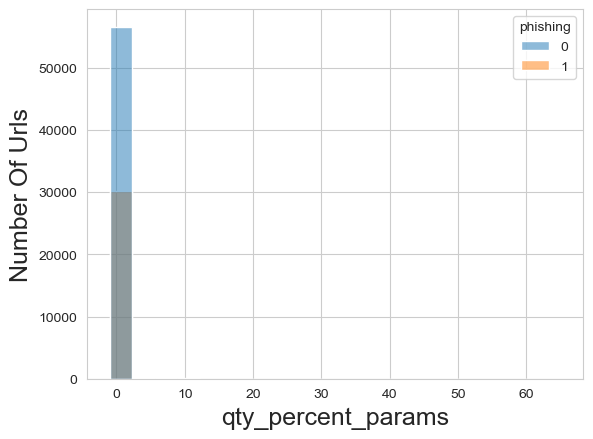



params_length
-1      79846
 165      526
 23       212
 27       174
 16       164
        ...  
 297        1
 250        1
 823        1
 284        1
 447        1
Name: count, Length: 354, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


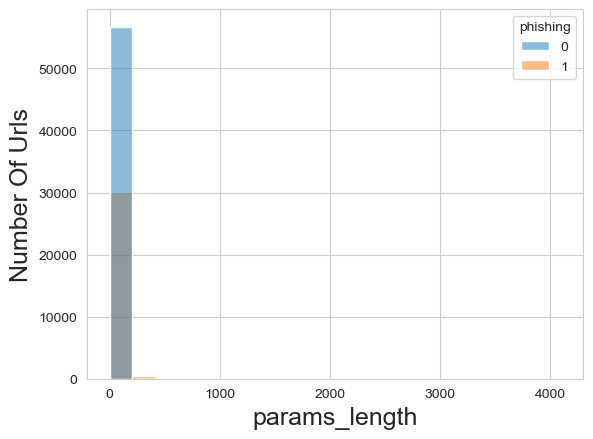



tld_present_params
-1    79846
 0     5201
 1     2162
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


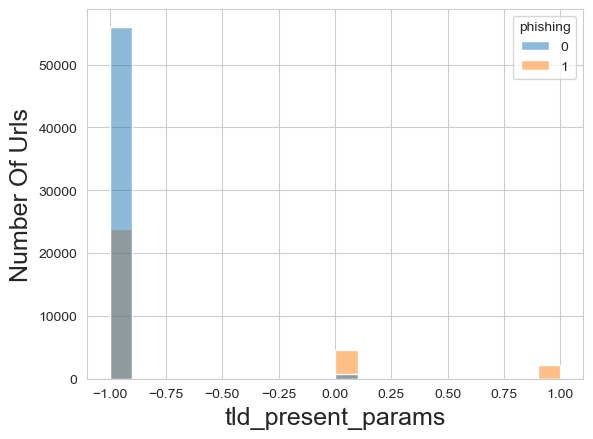



qty_params
-1     79846
 1      3292
 3      1295
 2      1118
 0       902
 4       326
 5       107
 6       107
 7       106
 10       34
 8        32
 9        15
 13       13
 11        7
 12        5
 15        1
 23        1
 18        1
 16        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


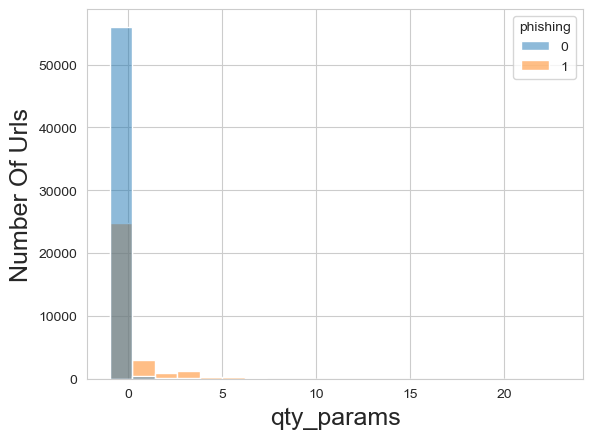



time_response
-1.000000    4422
 0.181128       4
 0.410012       3
 0.303279       3
 0.424417       3
             ... 
 2.281557       1
 0.553455       1
 0.219268       1
 0.517679       1
 0.459014       1
Name: count, Length: 80207, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


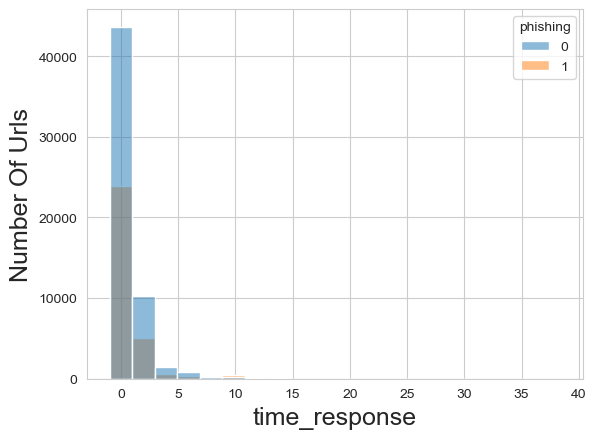



domain_spf
 0    59446
-1    14676
 1    13087
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


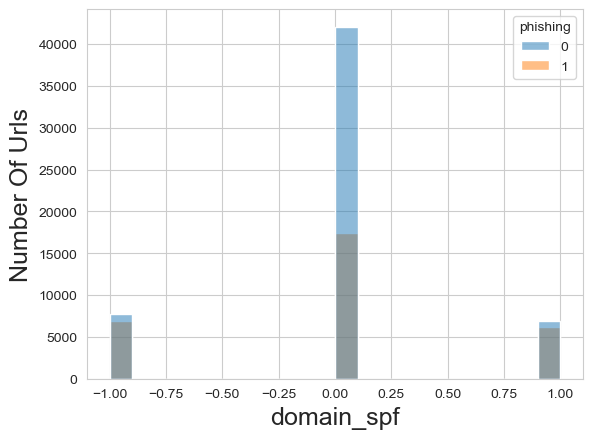



asn_ip
 13335    6132
 15169    5211
-1        5112
 26496    4181
 46606    3580
          ... 
 5470        1
 11520       1
 16657       1
 53412       1
 6794        1
Name: count, Length: 3638, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


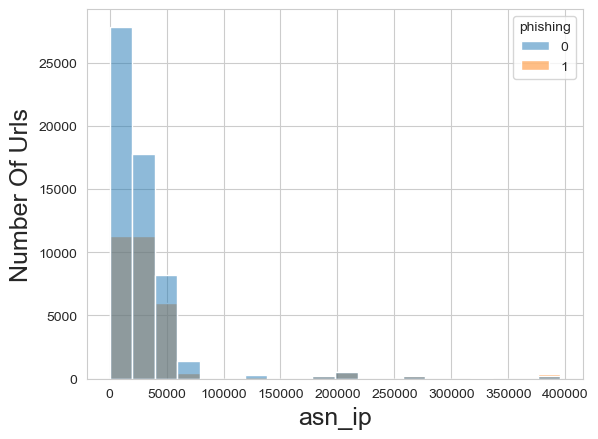



time_domain_activation
-1       23143
 7859      174
 8469      152
 8490      135
 8006      121
         ...  
 2635        1
 9234        1
 8101        1
 8672        1
 8770        1
Name: count, Length: 8790, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


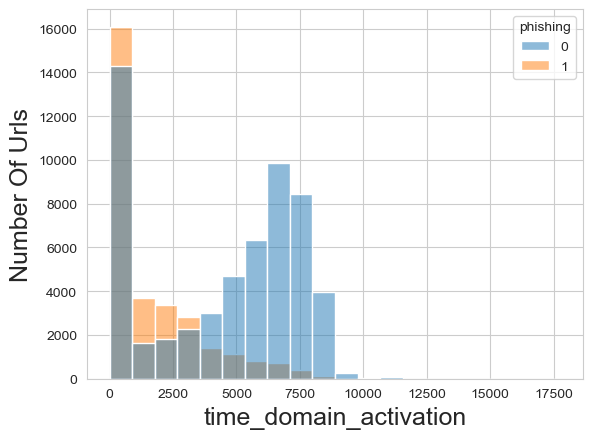



time_domain_expiration
-1       24997
 133       212
 132       193
 352       191
 281       184
         ...  
 2297        1
 2435        1
 2909        1
 3482        1
 3287        1
Name: count, Length: 3093, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


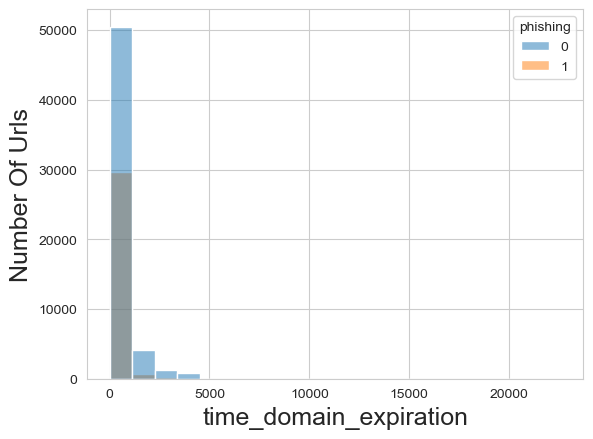



qty_ip_resolved
 1     71757
 2      8662
-1      3091
 4      1875
 5       996
 3       595
 6       103
 8        87
 9        12
 12       10
 7         9
 10        6
 11        2
 24        1
 19        1
 14        1
 13        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


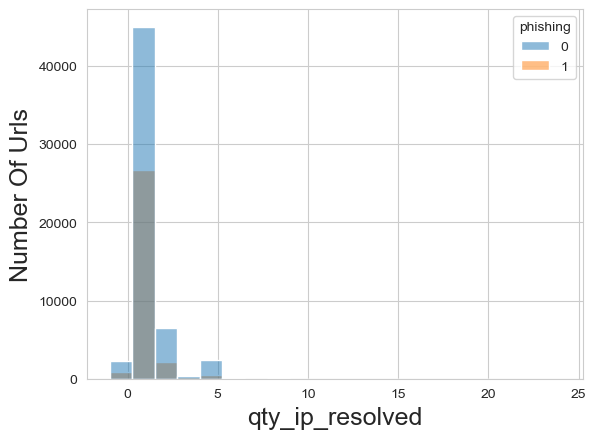



qty_nameservers
2     53415
4     17324
3      9214
5      2673
6      1532
1      1213
8       802
0       280
7       268
10      186
12      168
9        96
11       16
13       11
14        5
16        5
20        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


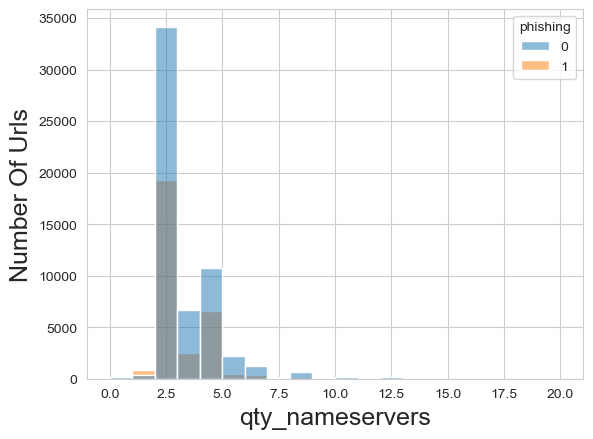



qty_mx_servers
1     43063
2     13964
0     12880
5      9624
3      3521
7      1947
4      1522
6       494
8       103
9        37
12       25
10       20
20        3
15        3
18        1
11        1
13        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


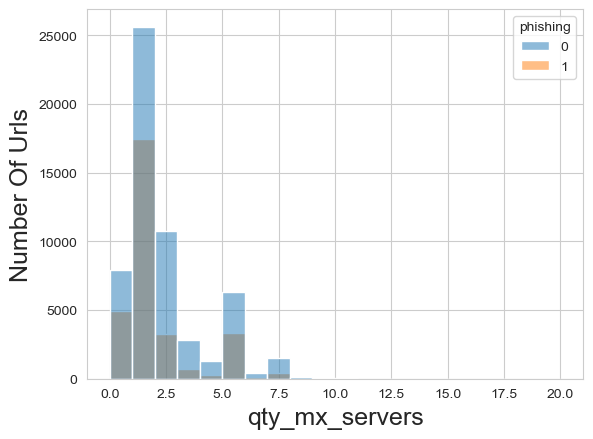



ttl_hostname
-1        3088
 299      2289
 3598     2133
 292      2078
 3599     1835
          ... 
 5549        1
 10916       1
 7860        1
 11192       1
 4817        1
Name: count, Length: 10171, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


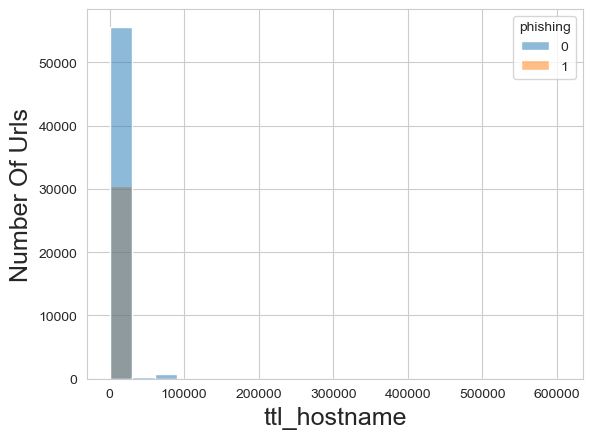



qty_redirects
 0     51930
 1     23828
-1      5512
 2      4713
 3       882
 4       264
 5        51
 6        14
 7         4
 9         3
 8         3
 10        2
 11        1
 12        1
 17        1
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


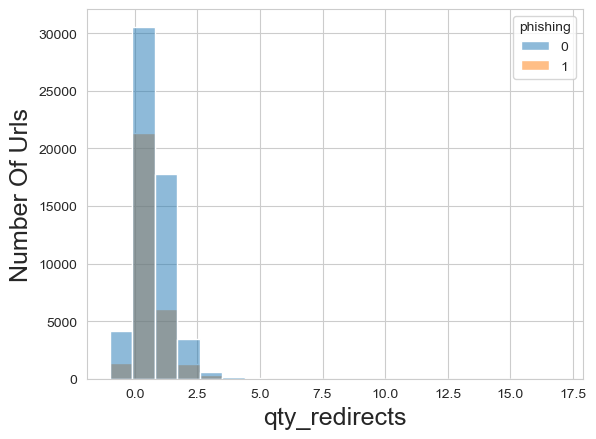



url_google_index
 0    86934
 1      209
-1       66
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


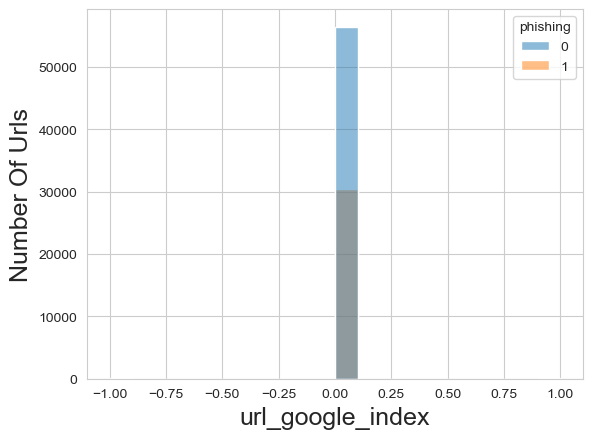



domain_google_index
 0    86884
 1      261
-1       64
Name: count, dtype: int64


c:\Users\PARIDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


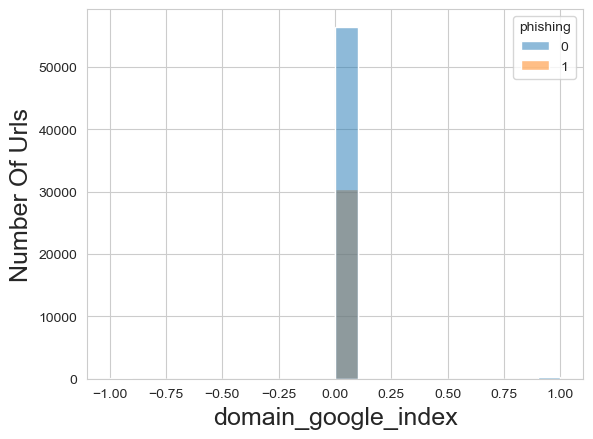

In [20]:
for i in numeric_cols:
   print(df[i].value_counts())
   sns.histplot(data=df,x=i,bins=20,hue='phishing')
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.show()
   print("\n")
     